In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %matplotlib inline
# %cd /content/gdrive/My Drive/Colab Notebooks
# # %mkdir IOT_project
# %cd IOT_project
# # %mkdir dataset
# %ls

In [53]:
pd.__version__

'0.24.2'

In [1]:
!ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
from IPython import display
import seaborn as sns
from scipy import signal
import parkinson_modules as pm
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
time_df = pd.DataFrame()
acc_df = pd.DataFrame()
hyr_df = pd.DataFrame()
mag_df = pd.DataFrame()
df = pd.DataFrame()

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'CNNModels.ipynb',
 'dictionary_results_pon.pkl',
 'EDA_model_exploration.ipynb',
 'for_pictures.ipynb',
 'gesture_pi',
 'maxresdefault.jpg',
 'parkinson_binary_feat_and_time_series.ipynb',
 'parkinson_binary_time_series.ipynb',
 'parkinson_classical_ml.ipynb',
 'Parkinson_clustering.ipynb',
 'parkinson_combine_exercises.ipynb',
 'parkinson_modules.py',
 'parkinson_multiclass_feat_and_time_series.ipynb',
 'README.md',
 '__pycache__']

In [4]:
os.chdir('C:\Files\parkinson')
info = pd.read_excel('Info.xlsx')
info = info.fillna(value = -1)
info.head(5)

,date,ID,ФИО,пол,возраст,Степень Паркинсона,Травмы/Патологии/Болезни,Баг в эксперименте1,Баг в эксперименте2,index1,index2
0,-1,1,Екатерина К,ж,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
1,-1,2,Анна Т,ж,23.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
2,-1,3,Александр Т,м,22.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
3,-1,4,Иван Д,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
4,-1,5,Дмитрий Е,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"


In [5]:
np.array([8, 8, 6, 7, 5, 3, 28, 5, 55, 1000000, 215 , 15, 17])/1.5

array([5.33333333e+00, 5.33333333e+00, 4.00000000e+00, 4.66666667e+00,
       3.33333333e+00, 2.00000000e+00, 1.86666667e+01, 3.33333333e+00,
       3.66666667e+01, 6.66666667e+05, 1.43333333e+02, 1.00000000e+01,
       1.13333333e+01])

In [6]:
(info['Степень Паркинсона'] == 'П(2)').sum()

18

In [7]:
file = pd.DataFrame()
columns_acc = [
    "acc_x, mg",
    'acc_y, mg',
    'acc_z, mg'  
]
columns_hyr = [
    'gyr_x, dps',
    'gyr_y, dps',
    'gyr_z, dps'
]

columns_mag = [
    'mag_x, mga',
    'mag_y, mga',
    'mag_z, mga'
]

In [8]:
nm = '01_2'
int(nm.split('_')[0])

1

##### Uncomment this, if you have data with parkinson's

In [9]:

os.chdir('C:/Files/parkinson')
path = 'C:/Files/parkinson/'
feature = {}
file = pd.DataFrame()
list_files = os.listdir()
count = 0
for name in list_files:
    if '.' not in name:
        patient = pm.parkinson(path + name)
        index = list(map(int, name.split('_')))
        if len(index) == 1:
            index.append(1)
        patient_info = info[info['ID'] == index[0]]
        indexes = list(map(int, patient_info['index' + str(index[1])][index[0] - 1].split(',')))
        if True: #(patient_info['Баг в эксперименте' + str(index[1])][index[0] - 1] == -1):
            patient.read(index = indexes)
            print(name)
            for exer_keys in patient.exercises:
                exers = patient.exercises[exer_keys]
                timing = patient.time[exer_keys]
                df = pm.calculate_batch({key : exers[key] for key in pm.columns_acc},
                                        {key : exers[key] for key in pm.columns_hyr},
                                        {key : exers[key] for key in pm.columns_mag},
                                         timing, patient_info, int(name.split('_')[0]), file, exer_keys, index, win_size = 1000, overlap= 50)
                file = file.append(df, ignore_index=True)
#                     acc_df = acc_df.append(df)
#                 for col in columns_hyr:
#                     df = calculate_batch(np.array(exers[col]), patient_info, name, hyr_df, col)
#                     hyr_df = hyr_df.append(df)
#                 df = calculate_batch(np.array(timing), patient_info, name, time_df, 'Time')
#                 time_df = time_df.append(df)
#             A = patient.to_dict()            
#             col = list(A.keys())
#             val = list(A.values())
#             df = pd.DataFrame(np.array(val).reshape(1,-1),
#                           columns = col, index = [count], dtype = np.float32)
#             if patient_info['Степень Паркинсона'][index[0] - 1] in [-1, 'здоров', 'здоровый', 'здоровая']:
#                 df['target'] = 0
#                 print(name, 'correct', patient_info['Степень Паркинсона'][index[0] - 1], df['target'][count],
#                       max( list( map(len, patient.time.values()) ) ) )
#             else:
#                 df['target'] = 1
#                 print(name, 'correct', patient_info['Степень Паркинсона'][index[0] - 1], df['target'][count],
#                      max( list( map(len, patient.time.values()) ) ) )
#             df['name'] = name
#             file = file.append(df)
#             count += 1
#         else:
#             print(name, 'incorrect')

01
01_2
02
02_2
03
03_2
04
04_2
05
05_2
06
06_2
07
07_2
08
08_2
09
09_2
10
10_2
11
11_2
12
12_2
13
13_2
14
14_2
15
15_2
16
17
17_02
18
18_02
19
19_02
20
20_2
21
22
22_2
23
23_2
24
24_2
25
25_2
26
27
28
28_2
29
30
31
32
32_2
33
33_2
34
35
36
37
38
39
40
41
41_2
42
42_2
43
43_2
44
ex16_2019-03-26_09_59_27_to_2019-03-26_10_00_28.csv 
 !!ERROR!!
45_2
46
47
48
49
50
51
ex16_2019-04-09_09_11_38_to_2019-04-09_09_12_55.csv 
 !!ERROR!!
52
53
53_2
54
54_2
55
55_2
56
56_2
57
57_2
58
59
60
61
61_2
ex16_2019-05-16 11_17_22_to_2019-05-16 11_18_24.csv 
 !!ERROR!!
62


AttributeError: 'int' object has no attribute 'split'

In [10]:
file = file[file.name != 62]

In [11]:
file.to_pickle('C:/Files/parkinson/data_10s.pkl')

In [9]:
# os.chdir(path)
file = pd.read_pickle('C:/Files/parkinson/data_10s.pkl')

In [10]:
file['name'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [11]:
train_inxs = np.random.choice(file['name'].unique(), replace= False, size= int(0.66*63))

train_file = pd.DataFrame()
test_file = pd.DataFrame()
for i in train_inxs:
    train_file = train_file.append(file[file['name'] == i], ignore_index= True)
    
for i in file['name'].unique():
    if i in train_inxs:
        continue
    test_file = test_file.append(file[file['name'] == i], ignore_index= True)
    
len(train_file), len(test_file)

(5927, 2853)

In [15]:
train_features = pm.feature_extract(train_file)
test_features = pm.feature_extract(test_file)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [16]:
train_features.isna().sum().sum(), test_features.isna().sum().sum()

(0, 0)

In [17]:
train_features.to_pickle('C:/Files/parkinson/train_features_1000points_50overlap_new_2std.pkl')
test_features.to_pickle('C:/Files/parkinson/test_features_1000points_50overlap_new_2std.pkl')

In [1]:
train_features = pd.read_pickle('C:/Files/parkinson/train_features_500points_50overlap_new_2std.pkl')
test_features = pd.read_pickle('C:/Files/parkinson/test_features_500points_50overlap_new_2std.pkl')


NameError: name 'pd' is not defined

In [12]:
features = train_features.append(test_features, ignore_index= True)
Parkinson_total_df = features[ (features['target'] != 3)]
train_features = train_features[ (train_features['target'] != 3)]
test_features = test_features[ (test_features['target'] != 3)]

In [14]:
Parkinson_total_df['target'].value_counts()

2    6130
0    5709
4    3666
1    2813
Name: target, dtype: int64

In [12]:
train_inxs = np.random.choice(Parkinson_total_df['name'].unique(), replace= False, size= int(0.66*62))

train_features = pd.DataFrame()
test_features = pd.DataFrame()
for i in train_inxs:
    train_features = train_features.append(Parkinson_total_df[Parkinson_total_df['name'] == i], ignore_index= True)
    
for i in features['name'].unique():
    if i in train_inxs:
        continue
    test_features = test_features.append(Parkinson_total_df[Parkinson_total_df['name'] == i], ignore_index= True)
    
print(train_features.target.value_counts(), test_features.target.value_counts())

2    2289
0    1709
1     997
4     906
Name: target, dtype: int64 4    780
0    769
2    673
1    155
Name: target, dtype: int64


In [28]:
train_features.shape, test_features.shape, Parkinson_total_df.shape

((13443, 471), (4936, 471), (18379, 471))

In [29]:
train_features['target'].value_counts(), test_features['target'].value_counts()

(2.0    4794
 0.0    4089
 4.0    2438
 1.0    2122
 Name: target, dtype: int64, 0.0    1620
 2.0    1343
 1.0    1314
 4.0     659
 Name: target, dtype: int64)

In [30]:
Parkinson_total_df.target.value_counts()

2.0    6137
0.0    5709
1.0    3436
4.0    3097
Name: target, dtype: int64

In [31]:
# train_inxs = np.random.choice(Parkinson_total_df['name'].unique(), replace= False, size= int(0.66*57))

# train_file = pd.DataFrame()
# test_file = pd.DataFrame()
# for i in train_inxs:
#     train_file = train_file.append(Parkinson_total_df[Parkinson_total_df['name'] == i], ignore_index= True)
    
# for i in Parkinson_total_df['name'].unique():
#     if i in train_inxs:
#         continue
#     test_file = test_file.append(Parkinson_total_df[Parkinson_total_df['name'] == i], ignore_index= True)
    
# len(train_file), len(test_file)

Text(0.5, 1.0, 'Information-criterion for model selection')

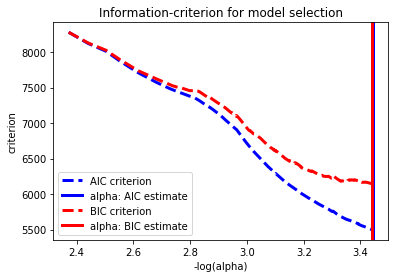

In [21]:
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

X = Parkinson_total_df.drop(columns= ['target', 'exercise_index', 'name'])
y = Parkinson_total_df['target']
# y = y.map({0 : 0, 'П(2)' : 1, 'П(3)' : 2, 'тремор' : 4, 'П(1)' : 3})
X = sclr.fit_transform(X)

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    EPSILON  = 1.e-4
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

In [32]:
indxs = model_aic.coef_.argsort()
X = train_features.drop(columns= ['target', 'exercise_index'])
aic_df = pd.DataFrame(data = {'names' : X.columns[indxs], 
                     'aic' : model_aic.coef_[indxs], 
                     'abs_aic' : np.abs(model_aic.coef_[indxs])}).sort_values('abs_aic').sort_values('aic')

In [33]:
indxs = model_bic.coef_.argsort()
X = train_features.drop(columns= ['target', 'exercise_index'])
bic_df = pd.DataFrame(data = {'names' : X.columns[indxs], 
                     'bic' : model_bic.coef_[indxs], 
                     'abs_bic' : np.abs(model_bic.coef_[indxs])}).sort_values('abs_bic').sort_values('bic')

In [34]:
sum_crit = aic_df.merge(bic_df)
sum_crit['crit'] = sum_crit['abs_aic']**2 + sum_crit['abs_bic']**2

In [35]:
sum_crit.sort_values('crit')[['names', 'aic', 'bic']].iloc[:100]

,names,aic,bic
233,"mag_x, mga_noise_less3hz_peaks_amplitude_max",0.0,0.0
301,"acc_y, mg_noise_std",0.0,0.0
300,"acc_x, mg_noise_more3hz_peaks_amplitude_std",0.0,0.0
299,"acc_x, mg_noise_more3hz_peaks_amplitude_min",0.0,0.0
298,"mag_z, mga_trend_less3hz_dominant_amplitude",0.0,0.0
297,"acc_x, mg_noise_less3hz_peaks_freq_mean",0.0,0.0
296,"acc_x, mg_noise_less3hz_peaks_freq_std",0.0,0.0
295,"acc_x, mg_noise_less3hz_peaks_freq_max",0.0,0.0
294,"acc_x, mg_noise_less3hz_dominant_frequency",0.0,0.0
293,"acc_x, mg_noise_less3hz_peaks_amplitude_mean",0.0,0.0


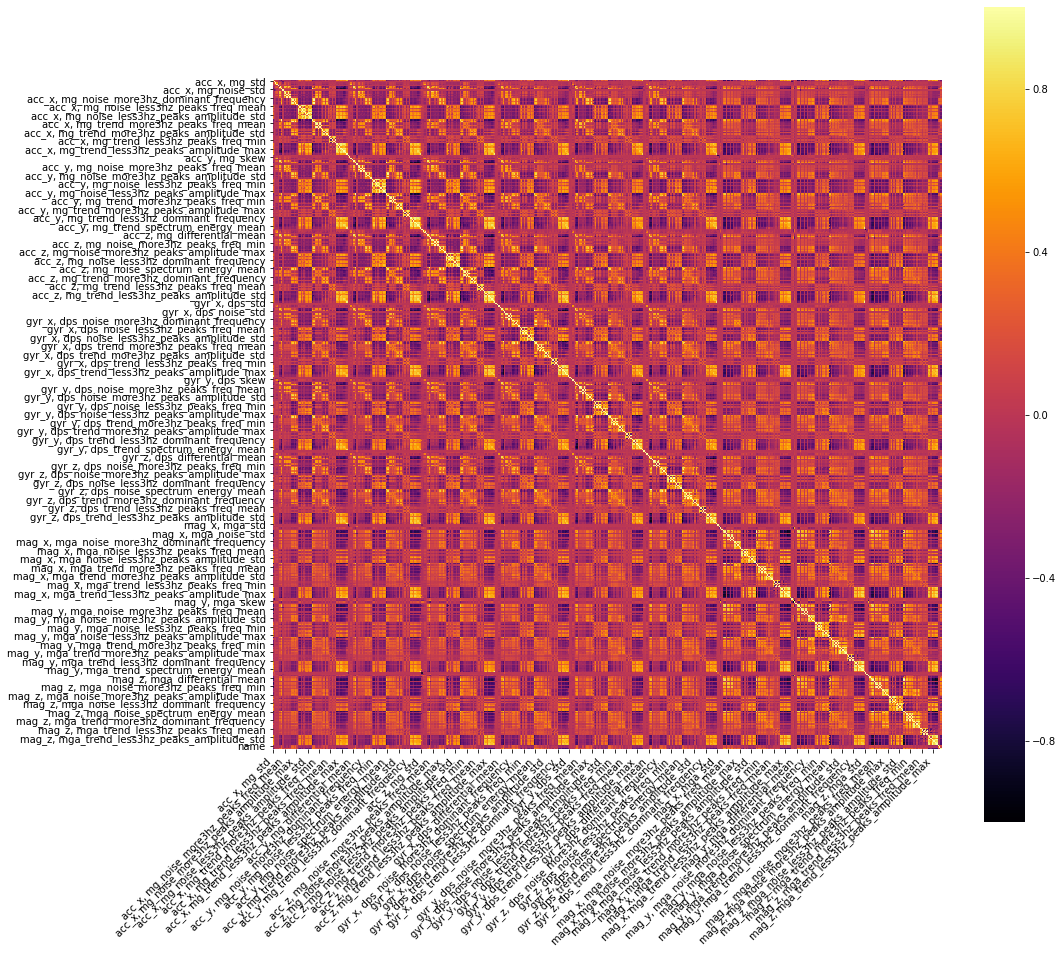

In [36]:
plt.figure(figsize= ( 15,15))
corr = train_features.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap= plt.cm.inferno,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [38]:
corr['target'].abs().sort_values()

mag_y, mga_noise_spectrum_energy_std             0.000505
mag_y, mga_trend_more3hz_peaks_amplitude_max     0.000573
acc_y, mg_trend_more3hz_peaks_freq_mean          0.000672
acc_x, mg_noise_mean                             0.000677
mag_y, mga_trend_less3hz_peaks_freq_mean         0.000740
mag_x, mga_mean                                  0.000769
gyr_x, dps_trend_less3hz_peaks_freq_max          0.001991
mag_y, mga_noise_more3hz_dominant_amplitude      0.002106
gyr_z, dps_noise_more3hz_dominant_amplitude      0.002124
gyr_x, dps_noise_more3hz_dominant_amplitude      0.002222
mag_x, mga_differential_mean                     0.002366
gyr_y, dps_noise_more3hz_dominant_amplitude      0.002649
gyr_z, dps_mean                                  0.002813
mag_x, mga_trend_more3hz_peaks_amplitude_std     0.002837
mag_x, mga_trend_less3hz_peaks_freq_min          0.003233
mag_x, mga_trend_less3hz_dominant_frequency      0.003233
mag_z, mga_noise_more3hz_dominant_amplitude      0.003351
acc_x, mg_tren

In [39]:
names = corr['target'].abs().sort_values()
names = list(names[-40:].to_dict().keys())

In [40]:
names

['gyr_y, dps_trend_spectrum_energy_std',
 'gyr_z, dps_noise_less3hz_peaks_amplitude_max',
 'gyr_y, dps_noise_less3hz_peaks_amplitude_mean',
 'acc_x, mg_noise_more3hz_peaks_freq_max',
 'gyr_x, dps_noise_more3hz_peaks_amplitude_mean',
 'acc_y, mg_noise_spectrum_energy_std',
 'gyr_x, dps_noise_more3hz_peaks_amplitude_max',
 'gyr_z, dps_noise_std',
 'acc_z, mg_noise_more3hz_peaks_amplitude_std',
 'acc_x, mg_noise_std',
 'acc_y, mg_noise_more3hz_peaks_amplitude_std',
 'gyr_x, dps_noise_std',
 'gyr_z, dps_noise_more3hz_peaks_amplitude_std',
 'acc_z, mg_noise_spectrum_energy_std',
 'acc_z, mg_noise_more3hz_peaks_amplitude_mean',
 'gyr_y, dps_noise_less3hz_peaks_amplitude_max',
 'acc_y, mg_noise_more3hz_peaks_amplitude_mean',
 'gyr_x, dps_noise_spectrum_energy_mean',
 'gyr_z, dps_noise_spectrum_energy_mean',
 'gyr_y, dps_trend_less3hz_peaks_amplitude_max',
 'acc_z, mg_noise_more3hz_peaks_amplitude_max',
 'gyr_y, dps_trend_less3hz_peaks_amplitude_mean',
 'gyr_z, dps_noise_more3hz_peaks_amplitud

In [41]:
# features.to_pickle('features.pkl')

In [42]:
# features = pd.read_csv('features.pkl')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from fylearn.nfpc import FuzzyPatternClassifier
from fylearn.garules import MultimodalEvolutionaryClassifier
from fylearn.fpt import FuzzyPatternTreeTopDownClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC

FPC = FuzzyPatternClassifier()
MEC = MultimodalEvolutionaryClassifier(n_iterations= 20)
FPC = FuzzyPatternTreeTopDownClassifier()
parameters = {'n_estimators': np.arange(200, 501, 100), 'max_depth' : np.arange(10, 61, 10)}
RFС0 = RandomForestClassifier(n_estimators = 30, max_depth = 5, class_weight = 'balanced')
RFС1 = RandomForestClassifier(n_estimators = 50, max_depth = 5, class_weight = 'balanced')
RFС2 = RandomForestClassifier(n_estimators = 70, max_depth = 5, class_weight = 'balanced')
RFС3 = RandomForestClassifier(n_estimators = 90, max_depth = 5, class_weight = 'balanced')
RFС4 = RandomForestClassifier(n_estimators = 30, max_depth = 15, class_weight = 'balanced')
RFС5 = RandomForestClassifier(n_estimators = 50, max_depth = 15, class_weight = 'balanced')
RFС6 = RandomForestClassifier(n_estimators = 70, max_depth = 15, class_weight = 'balanced')
RFС7 = RandomForestClassifier(n_estimators = 90, max_depth = 15, class_weight = 'balanced')
RFС8 = RandomForestClassifier(n_estimators = 30, max_depth = 25, class_weight = 'balanced')
RFС9 = RandomForestClassifier(n_estimators = 50, max_depth = 25, class_weight = 'balanced')
RFС10= RandomForestClassifier(n_estimators = 70, max_depth = 25, class_weight = 'balanced')
RFС11= RandomForestClassifier(n_estimators = 90, max_depth = 25, class_weight = 'balanced')
RFС12= RandomForestClassifier(n_estimators = 100, max_depth = 35, class_weight = 'balanced')

# LinSVM = LinearSVC( probability= True, class_weight = 'balanced')
RbfSVM = SVC(kernel = 'rbf', probability= True, class_weight = 'balanced')
PolySVM = SVC(kernel = 'poly', class_weight = 'balanced')
KNN = KNeighborsClassifier()
NB = GaussianNB()
LR = LogisticRegression(class_weight= 'balanced')
DT = DecisionTreeClassifier(max_depth = 100, class_weight='balanced')
QDA = QuadraticDiscriminantAnalysis()
GP = GaussianProcessClassifier(1.0 * RBF(1.0))
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
classifiers = {
     'RF 30 5' : RFС0,
     'RF 50 5' : RFС1,
     'RF 70 5' : RFС2,
     'RF 90 5' : RFС3,
     'RF 30 15' : RFС4,
     'RF 50 15' : RFС5,
     'RF 70 15' : RFС6,
     'RF 90 15' : RFС7,
     'RF 30 25' : RFС8,
     'RF 50 25' : RFС9,
     'RF 70 25' : RFС10,
     'RF 90 25' : RFС11,
     'RF 110 35' : RFС12,
    
#      'Linear SVM' : LinSVM,
     'rbf SVM' : RbfSVM,
#      'poly SVM': PolySVM,
#      'KNN' : KNN, 
#      'NB' : NB,
     'LR' : LR,
    'Adaboost' : AdaBoostClassifier(n_estimators = 50),
#     'SGD' : SGDClassifier(n_jobs= 4, class_weight= 'balanced' )
#      'DT' : DT,
#      'GaussProcess' : GP,
#      'QDA' : QDA
#      'Fuzzy Pattern' : FPC,
#      'MultiModalEvolutionary' : MEC,
#      'FuzzyPatternTreeTopDown' : FPC
}

In [17]:
train_len = int(0.666*len(Parkinson_total_df))
results, feature_importances_per_exercise = pm.predict(Parkinson_total_df.drop(columns = ['name']).iloc[:train_len], Parkinson_total_df.drop(columns = ['name']).iloc[train_len:], classifiers, return_feature_importance = True)
# s = results.sort_values(by = 'exer_idx').style.applymap(color_negative_red)
results

predict the parkinson stage


KeyError: "['name'] not found in axis"

In [47]:
Parkinson_total_df.target.unique()

array([1., 0., 2., 4.])

In [48]:
results_per_number_features = {}
for i in range(5, len(feature_importances_per_exercise[1].keys()), 20):
    print("Number of features is %d" % i)
    dct_features = {}
    for key in feature_importances_per_exercise:
        dct_features[key] = list(feature_importances_per_exercise[key].keys())[:i]
    results = pm.predict(train_features, test_features, classifiers, names_of_features= dct_features)
    
    results['number of features'] = [i]*len(results)
    results_per_number_features[i] = results.sort_values(by = 'exer_idx')
print("Number of features is %d" % len(feature_importances_per_exercise[1].keys()))

results = pm.predict(train_features, test_features, classifiers)
results['number of features'] = [len(feature_importances_per_exercise[1].keys())]*len(results)

results_per_number_features[len(feature_importances_per_exercise[1].keys())] = results.sort_values(by = 'exer_idx')

Number of features is 5
predict the parkinson stage
Number of features is 25
predict the parkinson stage
Number of features is 45
predict the parkinson stage
Number of features is 65
predict the parkinson stage
Number of features is 85
predict the parkinson stage
Number of features is 105
predict the parkinson stage
Number of features is 125
predict the parkinson stage
Number of features is 145
predict the parkinson stage
Number of features is 165
predict the parkinson stage
Number of features is 185
predict the parkinson stage
Number of features is 205
predict the parkinson stage
Number of features is 225
predict the parkinson stage
Number of features is 245
predict the parkinson stage
Number of features is 265
predict the parkinson stage
Number of features is 285
predict the parkinson stage
Number of features is 305
predict the parkinson stage
Number of features is 325
predict the parkinson stage
Number of features is 345
predict the parkinson stage
Number of features is 365
predict 

In [49]:
exercise_max_accuracy = {}
for i in np.unique(results_per_number_features[5]['exer_idx']):
    exercise_max_accuracy[i] = 0
    for key in results_per_number_features:
        a = results_per_number_features[key]
        value = a.drop(columns = ['exer_idx', 'train_len', 'test_len', 'number of features'])[a['exer_idx'] == i].max(axis = 1).iloc[0]
        
        if value > exercise_max_accuracy[i]:
            exercise_max_accuracy[i] = value
    
df_max_accuracy = pd.DataFrame()
df_max_accuracy['train_len'] = results.sort_values(by = 'exer_idx')['train_len']
df_max_accuracy['test_len']  = results.sort_values(by = 'exer_idx')['test_len']
df_max_accuracy['Exercise index']  = results.sort_values(by = 'exer_idx')['exer_idx']
df_max_accuracy['accuracy']  = list(exercise_max_accuracy.values())
df_max_accuracy.sort_values(by = 'Exercise index', ascending = True)

,train_len,test_len,Exercise index,accuracy
3,325,95,1,0.675099
4,1014,369,2,0.677576
11,249,101,3,0.650580
5,312,143,4,0.802618
6,447,194,5,0.505998
7,544,214,6,0.769436
8,456,167,7,0.475152
9,1115,389,8,0.461751
10,3867,1253,9,0.694636
0,1478,526,10,0.583612


In [50]:
result_per_classifier = pd.DataFrame()
for i in results_per_number_features:
    clmns = results_per_number_features[i].drop(columns = ['number of features']).columns
    for col in clmns:
        if col in result_per_classifier.columns:
            values0 = np.array(results_per_number_features[i][col].values)
            values1 = np.array(result_per_classifier[col].values)
            result_per_classifier[col] = np.maximum(values0, values1)
        else:
            result_per_classifier[col] = results_per_number_features[i][col]
result_per_classifier

,exer_idx,train_len,test_len,RF,KNN,NB,LR
3,1,325,95,0.654995,0.565849,0.467593,0.675099
4,2,1014,369,0.595280,0.433534,0.567338,0.677576
11,3,249,101,0.621329,0.650580,0.431616,0.605578
5,4,312,143,0.802618,0.446855,0.488981,0.397351
6,5,447,194,0.461992,0.437409,0.376229,0.505998
7,6,544,214,0.769436,0.471355,0.585114,0.639281
8,7,456,167,0.436433,0.424857,0.387250,0.475152
9,8,1115,389,0.437922,0.461751,0.393242,0.387609
10,9,3867,1253,0.694636,0.593362,0.509907,0.654483
0,10,1478,526,0.583612,0.559218,0.402529,0.553564


In [51]:
Parkinson_total_df_bin = Parkinson_total_df.copy()
train_features_bin = train_features.copy()
test_features_bin = test_features.copy()
Parkinson_total_df_bin['target'] = np.array(Parkinson_total_df_bin['target'] > 1.5, dtype = np.int)
train_features_bin['target'] = np.array(train_features_bin['target'] > 1.5, dtype = np.int)
test_features_bin['target']  = np.array( test_features_bin['target'] > 1.5, dtype = np.int)

In [52]:
test_features.target.value_counts()

0.0    1620
2.0    1343
1.0    1314
4.0     659
Name: target, dtype: int64

In [53]:
test_features_bin['target'].value_counts()

0    2934
1    2002
Name: target, dtype: int64

In [54]:
train_len = int(0.666*len(Parkinson_total_df_bin))
results, feature_importances_per_exercise = pm.predict(Parkinson_total_df_bin.drop(columns = ['name']).iloc[:train_len],
                                                       Parkinson_total_df_bin.drop(columns = ['name']).iloc[train_len:],
                                                       classifiers, return_feature_importance = True)
# s = results.sort_values(by = 'exer_idx').style.applymap(color_negative_red)
results_per_number_features = {}
for i in range(5, len(feature_importances_per_exercise[1].keys()), 20):
    print("Number of features is %d" % i)
    dct_features = {}
    for key in feature_importances_per_exercise:
        dct_features[key] = list(feature_importances_per_exercise[key].keys())[:i]
    results = pm.predict(train_features_bin, test_features_bin, classifiers, names_of_features= dct_features)
    
    results['number of features'] = [i]*len(results)
    results_per_number_features[i] = results.sort_values(by = 'exer_idx')
print("Number of features is %d" % len(feature_importances_per_exercise[1].keys()))

results = pm.predict(train_features_bin, test_features_bin, classifiers)
results['number of features'] = [len(feature_importances_per_exercise[1].keys())]*len(results)

results_per_number_features[len(feature_importances_per_exercise[1].keys())] = results.sort_values(by = 'exer_idx')
exercise_max_accuracy = {}
for i in np.unique(results_per_number_features[5]['exer_idx']):
    exercise_max_accuracy[i] = 0
    for key in results_per_number_features:
        a = results_per_number_features[key]
        value = a.drop(columns = ['exer_idx', 'train_len', 'test_len', 'number of features'])[a['exer_idx'] == i].max(axis = 1).iloc[0]
        
        if value > exercise_max_accuracy[i]:
            exercise_max_accuracy[i] = value
    
df_max_accuracy = pd.DataFrame()
df_max_accuracy['train_len'] = results.sort_values(by = 'exer_idx')['train_len']
df_max_accuracy['test_len']  = results.sort_values(by = 'exer_idx')['test_len']
df_max_accuracy['Exercise index']  = results.sort_values(by = 'exer_idx')['exer_idx']
df_max_accuracy['accuracy']  = list(exercise_max_accuracy.values())
df_max_accuracy#.sort_values(by = 'accuracy', ascending = False)

predict the parkinson stage
Number of features is 5
predict the parkinson stage
Number of features is 25
predict the parkinson stage
Number of features is 45
predict the parkinson stage
Number of features is 65
predict the parkinson stage
Number of features is 85
predict the parkinson stage
Number of features is 105
predict the parkinson stage
Number of features is 125
predict the parkinson stage
Number of features is 145
predict the parkinson stage
Number of features is 165
predict the parkinson stage
Number of features is 185
predict the parkinson stage
Number of features is 205
predict the parkinson stage
Number of features is 225
predict the parkinson stage
Number of features is 245
predict the parkinson stage
Number of features is 265
predict the parkinson stage
Number of features is 285
predict the parkinson stage
Number of features is 305
predict the parkinson stage
Number of features is 325
predict the parkinson stage
Number of features is 345
predict the parkinson stage
Number

,train_len,test_len,Exercise index,accuracy
3,325,95,1,0.667565
4,1014,369,2,0.733651
11,249,101,3,0.658692
5,312,143,4,0.727469
6,447,194,5,0.675532
7,544,214,6,0.757336
8,456,167,7,0.727841
9,1115,389,8,0.718219
10,3867,1253,9,0.743535
0,1478,526,10,0.646073


### Parkinson stage loo cross validation

In [7]:
def shuffler(df):
    # return the pandas dataframe
    return df.reindex(np.random.permutation(df.index))
# import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def CI_calculated(parkinson_df):
    df = parkinson_df.drop(index = ['exer_idx'])
    l_min = []
    l_max = []
    for col in df:
        x = df[col].values
        x = x[~np.isnan(x)]
        med, minim, maxim = mean_confidence_interval(x)
        l_min.append(minim)
        l_max.append(maxim)
    return l_min, l_max

In [99]:
results, feature_importances_per_exercise = pm.predict(train_features, test_features, classifiers, return_feature_importance = True)
results

predict the parkinson stage


,exer_idx,train_len,test_len,RF,Linear SVM,rbf SVM,KNN,LR,Adaboost,SGD
0,10,1322,591,0.474828,0.431200,0.389521,0.327033,0.412304,0.440874,0.351914
1,11,1024,491,0.291364,0.382809,0.338699,0.319077,0.351124,0.349245,0.313142
2,12,355,245,0.385846,0.426536,0.361369,0.280971,0.281036,0.343650,0.326383
3,1,248,177,0.499058,0.418049,0.415479,0.399294,0.292933,0.246485,0.371310
4,2,911,475,0.361629,0.336317,0.336600,0.349160,0.244373,0.406990,0.275963
5,4,295,168,0.253880,0.314221,0.269400,0.228678,0.330265,0.344032,0.298242
6,5,418,235,0.475156,0.425900,0.529531,0.428611,0.466192,0.453889,0.453912
7,6,508,259,0.332862,0.426029,0.354284,0.330247,0.469414,0.384467,0.461031
8,7,394,219,0.435354,0.417023,0.489704,0.425557,0.456169,0.435664,0.451622
9,8,1015,497,0.450383,0.423698,0.420017,0.426814,0.373341,0.455070,0.476904


In [16]:
parkinson_or_not_df = Parkinson_total_df[Parkinson_total_df['target'] != 0]
parkinson_or_not_df['target'] = np.array(parkinson_or_not_df['target'] > 3, dtype = np.int)
# corr = parkinson_or_not_df.corr()
# features_names = [name for name in parkinson_or_not_df.columns if np.abs(corr['target'][name]) > 0.01]
# if 'exercise_index' not in features_names:
#     features_names.append('exercise_index')
# parkinson_or_not_df = parkinson_or_not_df[features_names]
# print("CORR select", len(features_names), 'features')
RFC =RandomForestClassifier(n_estimators= 100, max_depth= 10)

In [17]:
parkinson_stage_df = Parkinson_total_df[Parkinson_total_df['target'] != 0]
parkinson_stage_df = parkinson_stage_df[parkinson_stage_df.target != 4]
parkinson_stage_df.target = np.array(parkinson_stage_df['target'] > 1.5, dtype = np.int)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## Using Correlation
corr = parkinson_or_not_df.corr()
features_names = [name for name in parkinson_or_not_df.columns if np.abs(corr['target'][name]) > 0.01]
if 'exercise_index' not in features_names:
    features_names.append('exercise_index')
parkinson_or_not_df = parkinson_or_not_df[features_names]
print("CORR select", len(features_names), 'features')


## Using Chi2
X = parkinson_or_not_df.drop(columns=['target'])
y = parkinson_or_not_df['target']
a, b = chi2(X.abs(), y)
ind = np.argsort(a)
selected_names = list(X.columns[ind[:200]])
if 'name' not in selected_names:
    selected_names.append('name')
if 'exercise_index' not in selected_names:
    selected_names.append('exercise_index')
X_new = X[selected_names]
print('Chi2 select', len(X_new.columns) ,'features')


## Using RF importance
X_new['target'] = y.values
# results, feature_importances_per_exercise = pm.predict(X_new.iloc[:int(0.66*len(X_new))], 
#                                                        X_new.iloc[int(0.66*len(X_new)):], 
#                                                        classifiers, return_feature_importance = True)
# print("RF select 150 features")
# for key in feature_importances_per_exercise:
#     feature_importances_per_exercise[key] =list(feature_importances_per_exercise[key].keys())[:150]

CORR select 378 features
Chi2 select 201 features


In [108]:
add_df = X_new[X_new.target == 1].copy()
X_new = X_new.append(add_df, ignore_index = True)


In [55]:
X_new.shape, X_new.target.value_counts()

((12609, 202), 0    8943
 1    3666
 Name: target, dtype: int64)

In [24]:

results_per_person_pon = {}
df = parkinson_or_not_df
peoples = parkinson_or_not_df.name.unique()
for i in tqdm(peoples):
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    results = pm.predict(train_df,test_df, 
                                       classifiers, 
                                       balanced_accuracy = False)#, use_dict = True)
    if len(results) != 0:
        results = results.sort_values('exer_idx')
    else:
        continue
    
    for key in classifiers:
        results_temp = pd.DataFrame()
        results_temp['exer_idx'] = results['exer_idx']
        results_temp[i] = results[key]
        if i == peoples[0]:
            results_per_person_pon[key] = results_temp.copy()
        else:
            results_per_person_pon[key] = pd.merge(results_per_person_pon[key], results_temp, how = 'outer')
#     break

  0%|                                                                                           | 0/33 [00:00<?, ?it/s]


NameError: name 'stack_model_df' is not defined

In [113]:
results_per_person_pon['Adaboost'].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
exer_idx,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000
39,1.000000,0.555556,1.000000,0.625000,0.571429,0.166667,0.933333,0.166667,0.895349,0.576271,0.850000,0.363636,0.266667,1.000000,0.956522
37,0.363636,0.733333,0.800000,0.750000,0.777778,0.818182,0.666667,0.529412,0.383333,0.888889,0.555556,0.800000,0.724138,0.727273,1.000000
45,0.333333,1.000000,0.857143,0.900000,NaN,1.000000,0.958333,0.333333,0.875000,0.660714,1.000000,0.600000,0.733333,0.130435,0.521739
31,0.250000,0.153846,0.333333,0.000000,0.666667,0.500000,0.000000,0.125000,0.607143,0.857143,0.133333,0.000000,0.391304,0.214286,NaN
25,0.750000,0.212121,0.500000,0.222222,0.200000,0.090909,0.272727,0.296296,0.588000,0.187500,0.185185,0.200000,0.055556,0.369565,0.021277
52,NaN,1.000000,0.809524,1.000000,0.692308,1.000000,0.842105,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.925926,0.680000
35,0.470588,0.937500,1.000000,0.500000,0.666667,0.800000,0.625000,0.384615,0.800000,0.518519,0.333333,0.833333,0.000000,0.304348,0.347826
48,0.714286,0.500000,0.833333,0.833333,0.750000,0.714286,1.000000,0.533333,1.000000,0.818182,0.625000,0.636364,0.695652,1.000000,0.956522
24,0.500000,1.000000,0.800000,1.000000,0.727273,0.888889,0.800000,0.833333,0.762238,0.531250,0.969697,0.333333,NaN,NaN,NaN


In [60]:
accuracy_list

['accuracy RF 30 5',
 'accuracy RF 50 5',
 'accuracy RF 70 5',
 'accuracy RF 90 5',
 'accuracy RF 30 15',
 'accuracy RF 50 15',
 'accuracy RF 70 15',
 'accuracy RF 90 15',
 'accuracy RF 30 25',
 'accuracy RF 50 25',
 'accuracy RF 70 25',
 'accuracy RF 90 25',
 'accuracy RF 110 35',
 'accuracy Linear SVM',
 'accuracy rbf SVM',
 'accuracy KNN',
 'accuracy LR',
 'accuracy Adaboost',
 'accuracy SGD']

In [9]:
loo_report_pon = pd.DataFrame()

accuracy_list = []
for key in results_per_person_pon:
    accuracy_list.append('accuracy ' + key)
    
for i, key in enumerate(results_per_person_pon):
#     print(key)
    loo_report = pd.DataFrame()

    loo_report['accuracy ' + key] = results_per_person_pon[key].drop(columns=['exer_idx']).mean(axis = 1)
    l_min, l_max = CI_calculated(results_per_person_pon[key].T)
    loo_report['accuracy CI min ' + key] = l_min
    loo_report['accuracy CI max ' + key] = l_max
    loo_report['exercise index'] = results_per_person_pon[key]['exer_idx']
    if i == 0:
        loo_report_pon = loo_report.copy()
    else:
        loo_report_pon = pd.merge(loo_report_pon, loo_report, how = 'outer')
loo_report_pon[accuracy_list].max(axis = 1)

0     0.777704
1     0.831905
2     0.827561
3     0.816165
4     0.755859
5     0.777872
6     0.761151
7     0.826401
8     0.757949
9     0.780586
10    0.799508
11    0.769696
12    0.836506
13    0.788118
14    0.835220
dtype: float64

In [15]:
def small_predict(train_features, test_features, classifiers, features_per_exer, person = -1, exercise_index = -1):
    X_train = train_features
    X_test  = test_features
    y_train = X_train['target'].values
    y_test  = X_test['target'].values

    XX_train = X_train.drop(columns= ['target', 'name', 'exercise_index'])
    XX_test  = X_test.drop( columns= ['target', 'name', 'exercise_index'])
    
    df = pd.DataFrame()
    
    names_of_features = list(features_per_exer[exercise_index].keys())
    for len_feat in range(10, len(names_of_features), 50):
#         print(len_feat)
        X_train = pm.sclr.fit_transform(XX_train[names_of_features[:len_feat]])
        X_test  = pm.sclr.transform(    XX_test [names_of_features[:len_feat]])
        df['exercise_index'] = [exercise_index]*len(X_test)
        df['name'] = [person]*len(X_test)
    #     print(y_test.shape, y_train.shape)
        for key in classifiers:
    #         print(key)
            model = classifiers[key]
            model.fit(X_train, y_train)
            y_pred = model.predict_proba(X_test)[:,0]
    #         print(len(y_pred))
            df[key +', num of features' + str(len_feat)] = y_pred

    return df

In [31]:
feature_importance_dict_rf = {}
for exercise in parkinson_or_not_df.exercise_index.unique():
    tr = parkinson_or_not_df[parkinson_or_not_df.exercise_index == exercise]
    train_len = int(0.66*len(tr))
    RFC.fit(tr.iloc[:train_len].drop(columns = ['target', 'name', 'exercise_index']), tr.iloc[:train_len].target)
    feature_importance_dict_rf[exercise] = {}
    columns = list(tr.drop(columns = ['target', 'name', 'exercise_index']).columns)
    feature_importance_dict_rf[exercise] = pd.Series(RFC.feature_importances_, index = columns).sort_values(ascending = False)
    

In [32]:

results_per_person_pon = {}
df = parkinson_or_not_df
peoples = parkinson_or_not_df.name.unique()
stack_model_df = pd.DataFrame()
for i in tqdm(peoples):
#     if i == 22:
#         continue
#     i = 6
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    
    for exercise in df.exercise_index.unique():
        train = train_df[train_df.exercise_index == exercise]
        test  = test_df [test_df.exercise_index == exercise ]
    
        if len(test) == 0:
            continue
            
        result = small_predict(train, test, classifiers, feature_importance_dict_rf, person = i, exercise_index = exercise)
        result['target'] = [test.target.values[0]]*len(result)
        stack_model_df = stack_model_df.append(result, ignore_index = True)





  0%|                                                                                           | 0/33 [00:00<?, ?it/s]


  3%|██▍                                                                             | 1/33 [12:06<6:27:24, 726.39s/it]


  6%|████▊                                                                           | 2/33 [24:08<6:14:37, 725.08s/it]


  9%|███████▎                                                                        | 3/33 [35:57<6:00:11, 720.37s/it]


 12%|█████████▋                                                                      | 4/33 [47:20<5:42:39, 708.96s/it]


 15%|████████████                                                                    | 5/33 [58:50<5:28:13, 703.36s/it]


 18%|██████████████▏                                                               | 6/33 [1:10:49<5:18:39, 708.14s/it]


 21%|████████████████▌                                                             | 7/33 [1:22:55<5:09:06, 713.33s/it]


 24%|████████████████

In [33]:
stack_model_df

,exercise_index,name,"RF 30 5, num of features10","RF 50 5, num of features10","RF 70 5, num of features10","RF 90 5, num of features10","RF 30 15, num of features10","RF 50 15, num of features10","RF 70 15, num of features10","RF 90 15, num of features10",...,"RF 90 15, num of features460","RF 30 25, num of features460","RF 50 25, num of features460","RF 70 25, num of features460","RF 90 25, num of features460","RF 110 35, num of features460","rbf SVM, num of features460","LR, num of features460","Adaboost, num of features460",target
0,10,39,0.493716,0.542584,0.530497,0.524370,0.466667,0.520000,0.557143,0.511111,...,0.844444,0.900000,0.820000,0.928571,0.844444,0.80,0.803350,0.981368,0.520935,0
1,10,39,0.945583,0.822579,0.896437,0.886169,0.933333,0.980000,0.871429,0.866667,...,0.877778,0.900000,0.980000,0.900000,0.855556,0.89,0.915503,0.999943,0.515142,0
2,10,39,0.931190,0.852886,0.893618,0.876027,0.966667,0.980000,0.871429,0.888889,...,0.900000,0.933333,0.940000,0.857143,0.944444,0.86,0.925979,0.960853,0.500633,0
3,10,39,0.876541,0.934188,0.880373,0.918193,0.933333,0.980000,0.985714,0.944444,...,0.922351,0.966667,0.900000,0.942857,0.944444,0.92,0.977127,0.884080,0.511328,0
4,10,39,0.939263,0.929996,0.923850,0.884070,0.933333,0.960000,0.985714,0.966667,...,0.888889,0.933333,0.840000,0.942857,0.844444,0.91,0.908097,0.776184,0.527551,0
5,10,39,0.872983,0.829794,0.794466,0.791301,0.866667,0.860000,0.857143,0.811111,...,0.911111,0.933333,0.900000,0.900000,0.911111,0.94,0.954165,0.998293,0.530088,0
6,10,39,0.773514,0.822824,0.773370,0.759241,0.933333,0.860000,0.885714,0.888889,...,0.944444,0.900000,0.760000,0.900000,0.922222,0.91,0.910372,0.993338,0.548779,0
7,10,39,0.795490,0.842824,0.763543,0.755081,0.933333,0.880000,0.885714,0.877778,...,0.944444,0.866667,0.820000,0.914286,0.933333,0.93,0.978995,0.999958,0.574594,0
8,10,39,0.716933,0.737265,0.688453,0.716247,0.900000,0.820000,0.830704,0.844444,...,0.933333,0.900000,0.940000,0.900000,0.966667,0.89,0.962836,0.996935,0.533377,0
9,10,39,0.792513,0.826351,0.783501,0.773960,0.966667,0.940000,0.928571,0.922222,...,0.922222,1.000000,0.940000,0.957143,0.933333,0.91,0.987917,0.999904,0.559856,0


In [20]:
from sklearn.decomposition import PCA, KernelPCA, FastICA, FactorAnalysis, DictionaryLearning, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
pca = PCA(n_components= 30)
kernel_pca_rbf = KernelPCA(n_components = 30, kernel = 'rbf', n_jobs = -1)
kernel_pca_sigm = KernelPCA(n_components = 30, kernel = 'sigmoid', n_jobs = -1)
kernel_pca_cos = KernelPCA(n_components = 30, kernel = 'cosine', n_jobs = -1)
kernel_pca_poly = KernelPCA(n_components = 30, kernel = 'poly', n_jobs = -1)
incrPCA = IncrementalPCA(n_components = 30, )
dict_anal = DictionaryLearning(n_components = 30)
LDA = LinearDiscriminantAnalysis(n_components = 1)
# QDA = QuadraticDiscriminantAnalysis(n_components = 30)

fast_ica = FastICA(n_components= 30)
factor_anal = FactorAnalysis(n_components= 30)
decomps = {
    'PCA' : pca,
#     'dict anal' : dict_anal,
    'KernelPCA sigm' : kernel_pca_sigm, 
    'KernelPCA cos' : kernel_pca_cos,
    'KernelPCA sigm' : kernel_pca_poly, 
    'KernelPCA rbf' : kernel_pca_rbf,
    'FastICA' : fast_ica, 
    'Factor' : factor_anal,
    'LDA' : LDA
#     'QDA' : QDA
    
}

In [35]:

results_per_person_pon = {}
df = parkinson_or_not_df
peoples = parkinson_or_not_df.name.unique()
stack_model_df_tr = pd.DataFrame()
for i in tqdm(peoples):
#     if i == 22:
#         continue
#     i = 6
#     print(i)
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    
    for exercise in df.exercise_index.unique():
        result = pd.DataFrame()
        train = train_df[train_df.exercise_index == exercise]
        test  = test_df [test_df.exercise_index == exercise ]
        if len(test) == 0:
            continue
        for key in decomps:
#             print(key)
            decomps[key].fit(train.drop(columns= ['target','name','exercise_index']), y = train.target)
            test_tr = decomps[key].transform(test.drop(columns = ['target','name','exercise_index']))
            if key == 'LDA':
                result['LDA'] = test_tr[:,0]
            else:
                for transf_index in range(30):            
                    result[key + ' transform ' + str(transf_index)] = test_tr[:, transf_index]


        result['target'] = [test.target.values[0]]*len(result)
        result['name'] = [test.name.values[0]]*len(result)
        result['exercise_index'] = [test.exercise_index.values[0]]*len(result)


        stack_model_df_tr = stack_model_df_tr.append(result, ignore_index = True)
#         break
#     break




  0%|                                                                                           | 0/33 [00:00<?, ?it/s]


  3%|██▌                                                                                | 1/33 [00:58<31:05, 58.31s/it]


  6%|█████                                                                              | 2/33 [01:52<29:29, 57.09s/it]


  9%|███████▌                                                                           | 3/33 [02:49<28:32, 57.10s/it]


 12%|██████████                                                                         | 4/33 [03:44<27:15, 56.39s/it]


 15%|████████████▌                                                                      | 5/33 [04:44<26:49, 57.47s/it]


 18%|███████████████                                                                    | 6/33 [05:43<26:03, 57.89s/it]


 21%|█████████████████▌                                                                 | 7/33 [06:39<24:49, 57.29s/it]


 24%|████████████████

In [36]:
for col in stack_model_df_tr:
    if col in ['target', 'name', 'exercise_index']:
        continue
    stack_model_df[col] = stack_model_df_tr[col].values
stack_model_df = pd.read_pickle('C:/Files/parkinson/stacked_model_with_pcas.pkl')
RFC = RandomForestClassifier(n_estimators= 100, max_depth= 10)

In [37]:
# stack_model_df.to_pickle('C:/Files/parkinson/stacked_model_with_pcas.pkl')

In [48]:
stack_model_df = pd.read_pickle('C:/Files/parkinson/stacked_model_with_pcas.pkl')

In [49]:
RFC = RandomForestClassifier(n_estimators= 100, max_depth= 10)
    feature_importance_dict_rf[exercise] = pd.Series(RFC.feature_importances_, index = columns).sort_values(ascending = False)


In [50]:
feature_importance_dict_rf = {}
for exercise in stack_model_df.exercise_index.unique():
    tr = stack_model_df[stack_model_df.exercise_index == exercise]
    train_len = int(0.66*len(tr))
    RFC.fit(tr.iloc[:train_len].drop(columns = ['target', 'name', 'exercise_index']), tr.iloc[:train_len].target)
    feature_importance_dict_rf[exercise] = {}
    columns = list(tr.drop(columns = ['target', 'name', 'exercise_index']).columns)
    feature_importance_dict_rf[exercise] = pd.Series(RFC.feature_importances_, index = columns).sort_values(ascending = False)
    

In [41]:
names_keys = []
for key in classifiers:
    for features_size in range(18, len(stack_model_df.columns), 30):
        names_keys.append(key + ', feature_size ' + str(features_size))

In [42]:
len(names_keys)

176

In [43]:
###  SHOULD DONE IT
results_per_person_pon = {}
df = stack_model_df
peoples = stack_model_df.name.unique()
for i in tqdm(peoples):
#     print(i)
#     if i == 22:
#         continue
#     i = 6
    result_temp_temp = pd.DataFrame()
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    for features_size in range(18, len(stack_model_df.columns), 30):
        feature_importances_per_exercise = {}
        for key in feature_importance_dict_rf:
            feature_importances_per_exercise[key] = list(feature_importance_dict_rf[key].keys())[:features_size]
        results = pm.predict(train_df,test_df, 
                                           classifiers, 
                                           names_of_features = feature_importances_per_exercise,
                                           balanced_accuracy = False)#.sort_values('exer_idx')#, use_dict = True)
        
        for key in classifiers:
            result_temp_temp[key + ', feature_size ' + str(features_size)] = results[key]
#     break
    result_temp_temp['exer_idx'] = results['exer_idx']
    if len(result_temp_temp) != 0:
        result_temp_temp = result_temp_temp.sort_values('exer_idx')
    else:
        continue
    
    for key in names_keys:
        results_temp = pd.DataFrame()
        results_temp['exer_idx'] = result_temp_temp['exer_idx']
        results_temp[i] = result_temp_temp[key]
        if i == peoples[0]:
            results_per_person_pon[key] = results_temp.copy()
        else:
            results_per_person_pon[key] = pd.merge(results_per_person_pon[key], results_temp, how = 'outer')
#     break




  0%|                                                                                           | 0/33 [00:00<?, ?it/s]


  3%|██▍                                                                             | 1/33 [10:02<5:21:08, 602.14s/it]


  6%|████▊                                                                           | 2/33 [20:01<5:10:39, 601.26s/it]


  9%|███████▎                                                                        | 3/33 [29:50<4:58:52, 597.76s/it]


 12%|█████████▋                                                                      | 4/33 [39:16<4:44:15, 588.11s/it]


 15%|████████████                                                                    | 5/33 [48:49<4:32:16, 583.45s/it]


 18%|██████████████▌                                                                 | 6/33 [58:46<4:24:27, 587.69s/it]


 21%|████████████████▌                                                             | 7/33 [1:08:52<4:16:57, 592.98s/it]


 24%|████████████████

In [3]:
import pickle

In [4]:
# with open('dictionary_results_pon.pkl', 'wb') as config_dictionary_file:
#     pickle.dump(results_per_person_pon, config_dictionary_file)

In [5]:
with open('C:/Users/alexandr/Desktop/python/Parkinson-s_Disease-master/dictionary_results_pon.pkl', 'rb') as config_dictionary_file:
    results_per_person_pon = pickle.load(config_dictionary_file)

In [10]:
loo_report_pon = pd.DataFrame()

accuracy_list = []
max_conf = []
for key in results_per_person_pon:
    accuracy_list.append('accuracy ' + key)
    
    
for i, key in enumerate(results_per_person_pon):
#     print(key)
    loo_report = pd.DataFrame()

    loo_report['accuracy ' + key] = results_per_person_pon[key].drop(columns=['exer_idx']).mean(axis = 1)
    l_min, l_max = CI_calculated(results_per_person_pon[key].T)
    loo_report['accuracy CI min ' + key] = l_min
    loo_report['accuracy CI max ' + key] = l_max
    loo_report['exercise index'] = results_per_person_pon[key]['exer_idx']
    if i == 0:
        loo_report_pon = loo_report.copy()
    else:
        loo_report_pon = pd.merge(loo_report_pon, loo_report, how = 'outer')
loo_report_pon[accuracy_list].max(axis = 1)

0     0.777704
1     0.831905
2     0.827561
3     0.816165
4     0.755859
5     0.777872
6     0.761151
7     0.826401
8     0.757949
9     0.780586
10    0.799508
11    0.769696
12    0.836506
13    0.788118
14    0.835220
dtype: float64

In [12]:
to_conf_interval_pon = pd.DataFrame()
best_model_per_exer = {i : loo_report_pon[accuracy_list].iloc[i].sort_values(ascending = False).keys()[0][9:] for i in range(15)}
for i in best_model_per_exer:
    to_conf_interval_pon[i+1] = results_per_person_pon[best_model_per_exer[i]].drop(columns = ['exer_idx']).iloc[i]


Text(0, 0.5, 'Accuracy')

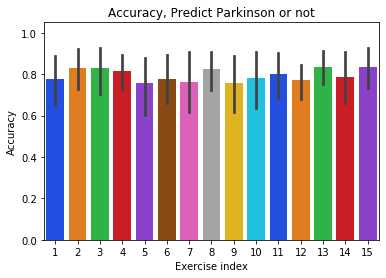

In [14]:
sns.barplot(data = to_conf_interval_pon, palette= sns.color_palette('bright'))

plt.title("Accuracy, Predict Parkinson or not")
plt.ylim(0, 1.05)
plt.xlabel('Exercise index')
plt.ylabel('Accuracy')

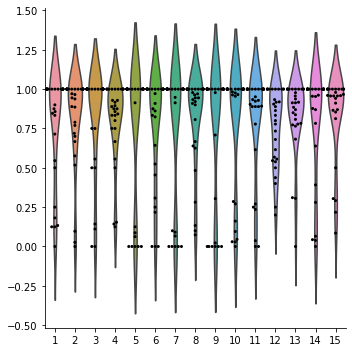

In [46]:
g = sns.catplot( kind="violin", inner=None, 
                data = to_conf_interval_pon
                )
sns.swarmplot(color="k", size=3, 
              data = to_conf_interval_pon,
        ax=g.ax)

In [32]:
feature_importance_dict_rf = {}
for exercise in parkinson_stage_df.exercise_index.unique():
    tr = parkinson_stage_df[parkinson_stage_df.exercise_index == exercise]
    train_len = int(0.66*len(tr))
    RFC.fit(tr.iloc[:train_len].drop(columns = ['target', 'name', 'exercise_index']), tr.iloc[:train_len].target)
    feature_importance_dict_rf[exercise] = {}
    columns = list(tr.drop(columns = ['target', 'name', 'exercise_index']).columns)
    feature_importance_dict_rf[exercise] = pd.Series(RFC.feature_importances_, index = columns).sort_values(ascending = False)
    

In [34]:
df = parkinson_stage_df
peoples = parkinson_stage_df.name.unique()
stack_model_df_stage = pd.DataFrame()
for i in tqdm(peoples):
#     if i == 22:
#         continue
#     i = 6
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    
    for exercise in df.exercise_index.unique():
        train = train_df[train_df.exercise_index == exercise]
        test  = test_df [test_df.exercise_index == exercise ]
    
        if len(test) == 0:
            continue
            
        result = small_predict(train, test, classifiers, feature_importance_dict_rf, person = i, exercise_index = exercise)
        result['target'] = [test.target.values[0]]*len(result)
        stack_model_df_stage = stack_model_df_stage.append(result, ignore_index = True)
#     break

100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [3:05:19<00:00, 447.20s/it]


In [35]:
stack_model_df_stage.shape

(8943, 163)

In [36]:

results_per_person_stage = {}
df = parkinson_stage_df
peoples = parkinson_stage_df.name.unique()
stack_model_df_stage_tr = pd.DataFrame()
for i in tqdm(peoples):
#     if i == 22:
#         continue
#     i = 6
#     print(i)
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    
    for exercise in df.exercise_index.unique():
#         print(exercise)
        result = pd.DataFrame()
        train = train_df[train_df.exercise_index == exercise]
        test  = test_df [test_df.exercise_index == exercise ]
        if len(test) == 0:
            continue
        for key in decomps:
#             print(key)
            decomps[key].fit(train.drop(columns= ['target','name','exercise_index']), y = train.target)
            test_tr = decomps[key].transform(test.drop(columns = ['target','name','exercise_index']))
            if key == 'LDA':
                result['LDA'] = test_tr[:,0]
            else:
                for transf_index in range(30):            
                    result[key + ' transform ' + str(transf_index)] = test_tr[:, transf_index]


        result['target'] = [test.target.values[0]]*len(result)
        result['name'] = [test.name.values[0]]*len(result)
        result['exercise_index'] = [test.exercise_index.values[0]]*len(result)


        stack_model_df_stage_tr = stack_model_df_stage_tr.append(result, ignore_index = True)
#         break
#     break

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [17:26<00:00, 41.21s/it]


In [37]:
for col in stack_model_df_stage_tr:
    if col in ['target', 'name', 'exercise_index']:
        continue
    stack_model_df_stage[col] = stack_model_df_stage_tr[col].values

RFC = RandomForestClassifier(n_estimators= 100, max_depth= 10)

In [38]:
stack_model_df_stage.to_pickle('C:/Files/parkinson/stacked_model_stage_with_pcas.pkl')

In [39]:
feature_importance_dict_rf = {}
for exercise in stack_model_df_stage.exercise_index.unique():
    tr = stack_model_df_stage[stack_model_df_stage.exercise_index == exercise]
    train_len = int(0.66*len(tr))
    RFC.fit(tr.iloc[:train_len].drop(columns = ['target', 'name', 'exercise_index']), tr.iloc[:train_len].target)
    feature_importance_dict_rf[exercise] = {}
    columns = list(tr.drop(columns = ['target', 'name', 'exercise_index']).columns)
    feature_importance_dict_rf[exercise] = pd.Series(RFC.feature_importances_, index = columns).sort_values(ascending = False)


In [40]:
names_keys = []
for key in classifiers:
    for features_size in range(18, len(stack_model_df_stage.columns), 30):
        names_keys.append(key + ', feature_size ' + str(features_size))

In [41]:
###  SHOULD DONE IT
results_per_person_stage = {}
df = stack_model_df_stage
peoples = stack_model_df_stage.name.unique()
for i in tqdm(peoples):
#     print(i)
#     if i == 22:
#         continue
#     i = 6
    result_temp_temp = pd.DataFrame()
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    for features_size in range(18, len(stack_model_df_stage.columns), 30):
        feature_importances_per_exercise = {}
        for key in feature_importance_dict_rf:
            feature_importances_per_exercise[key] = list(feature_importance_dict_rf[key].keys())[:features_size]
        results = pm.predict(train_df,test_df, 
                                           classifiers, 
                                           names_of_features = feature_importances_per_exercise,
                                           balanced_accuracy = False)#.sort_values('exer_idx')#, use_dict = True)
        
        for key in classifiers:
            result_temp_temp[key + ', feature_size ' + str(features_size)] = results[key]
#     break
    result_temp_temp['exer_idx'] = results['exer_idx']
    if len(result_temp_temp) != 0:
        result_temp_temp = result_temp_temp.sort_values('exer_idx')
    else:
        continue
    
    for key in names_keys:
        results_temp = pd.DataFrame()
        results_temp['exer_idx'] = result_temp_temp['exer_idx']
        results_temp[i] = result_temp_temp[key]
        if i == peoples[0]:
            results_per_person_stage[key] = results_temp.copy()
        else:
            results_per_person_stage[key] = pd.merge(results_per_person_stage[key], results_temp, how = 'outer')
#     break

100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [2:36:59<00:00, 382.05s/it]


In [44]:
import pickle

In [15]:
# with open('C:/Files/parkinson/dictionary_results_stage.pkl', 'wb') as config_dictionary_file:
#     pickle.dump(results_per_person_stage, config_dictionary_file)

In [16]:
with open('C:/Files/parkinson/dictionary_results_stage.pkl', 'rb') as config_dictionary_file:
    results_per_person_stage = pickle.load( config_dictionary_file)

In [17]:
loo_report_stage = pd.DataFrame()

accuracy_list = []
max_conf = []
for key in results_per_person_stage:
    accuracy_list.append('accuracy ' + key)
    
    
for i, key in enumerate(results_per_person_stage):
#     print(key)
    loo_report = pd.DataFrame()

    loo_report['accuracy ' + key] = results_per_person_stage[key].drop(columns=['exer_idx']).mean(axis = 1)
    l_min, l_max = CI_calculated(results_per_person_stage[key].T)
    loo_report['accuracy CI min ' + key] = l_min
    loo_report['accuracy CI max ' + key] = l_max
    loo_report['exercise index'] = results_per_person_stage[key]['exer_idx']
    if i == 0:
        loo_report_stage = loo_report.copy()
    else:
        loo_report_stage = pd.merge(loo_report_stage, loo_report, how = 'outer')
loo_report_stage[accuracy_list].max(axis = 1)

0     0.890256
1     0.876519
2     0.808652
3     0.759177
4     0.801934
5     0.764866
6     0.765618
7     0.844577
8     0.752458
9     0.839932
10    0.784806
11    0.813817
12    0.852837
13    0.954545
14    0.832790
dtype: float64

In [18]:
best_model_per_exer = {i : loo_report_stage[accuracy_list].iloc[i].sort_values(ascending = False).keys()[0][9:] for i in range(15)}

In [19]:
to_conf_interval_pon = pd.DataFrame()
for i in best_model_per_exer:
    to_conf_interval_pon[i+1] = results_per_person_stage[best_model_per_exer[i]].drop(columns = ['exer_idx']).iloc[i]


In [50]:
to_conf_interval_pon.to_pickle('C:/Files/parkinson/conf_interval.pkl')

In [43]:
color_list = sns.color_palette("RdBu_r", 15)

In [47]:
color_list[7] = (0.8, 0.8, 0.8)

In [45]:
# color_list = ['b' ]

Text(0, 0.5, 'Accuracy')

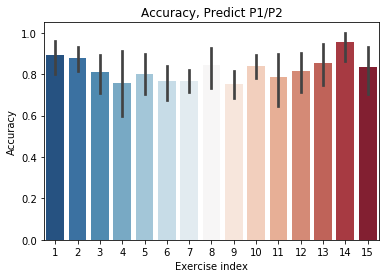

In [52]:
to_conf_interval_pon = pd.read_pickle('C:/Files/parkinson/conf_interval.pkl')
color_list = sns.color_palette("RdBu_r", 15)
sns.barplot(data = to_conf_interval_pon,  palette= color_list)


plt.title("Accuracy, Predict P1/P2")
plt.ylim(0,1.05)
plt.xlabel('Exercise index')
plt.ylabel('Accuracy')

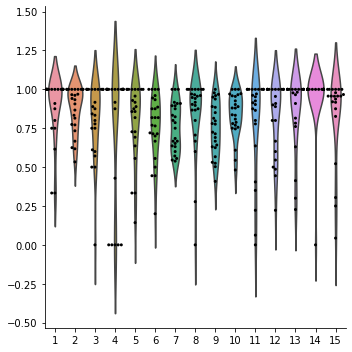

In [72]:
g = sns.catplot( kind="violin", inner=None, 
                data = to_conf_interval_pon
                )
sns.swarmplot(color="k", size=3, 
              data = to_conf_interval_pon,
        ax=g.ax)

In [71]:
for i in stack_model_df_stage.exercise_index.unique():
    to_plot_df = stack_model_df_stage[stack_model_df_stage.exercise_index == i]
    print(i, len(to_plot_df.target))

10 951
11 655
12 306
13 627
14 676
15 633
1 189
2 574
3 207
4 271
5 313
6 403
7 330
8 487
9 2321


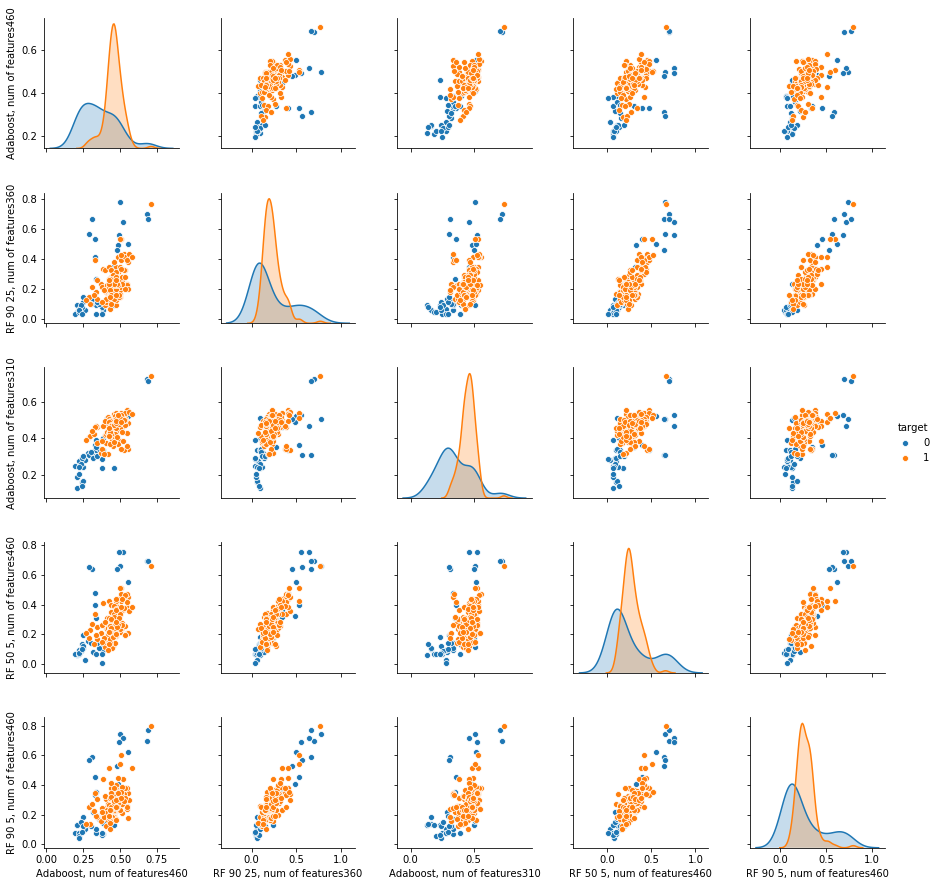

In [64]:
sns.pairplot(to_plot_df, vars = feature_importances_per_exercise[1][:5], hue = 'target')

In [ ]:
sns.pairplot(results_per_person_pon, vars=feature_importances_per_exercise[1][:5], hue = 'target')

In [41]:
err_person = {}
for ind in results_per_person_pon['RF'].T.columns:
    err_person[ind + 1] = []
    for col in results_per_person_pon['RF'].T.index:
        if results_per_person_pon['RF'].T[ind][col] < 0.2:
            if results_per_person_pon['RF'].T[ind][col] != np.NAN:
                err_person[ind + 1].append(col)
err_person

{1: [57, 55, 38, 40, 25, 31, 32],
 2: [22, 38, 28, 31, 32],
 3: [22, 57, 38, 28, 31, 32],
 4: [22, 57, 23, 55, 38, 25, 28, 32],
 5: [22, 57, 55, 28, 32, 35],
 6: [22, 55, 38, 25, 28, 31, 32],
 7: [22, 55, 25, 28, 31, 32],
 8: [28, 31, 32],
 9: [22, 55, 25, 32],
 10: [57, 25, 31, 32],
 11: [22, 57, 55, 50, 38, 25, 31, 32],
 12: [22, 57, 55, 38, 25, 31, 32],
 13: [38, 25, 59, 35],
 14: [57, 38, 25, 45, 31, 32, 33],
 15: [57, 55, 38, 25, 51, 32, 35]}

In [83]:
# 22 - дистонический тремор
# 25 - поструальный тремор
# 29 - П(1)
# 28
# 32 - тремор хз какой
# 35 - П(2)
# 38 - Синдром Паркинсона
# 55 - Синдром Паркинсона. Постуральный 
# 57 - Эссенциальный тремор
# 62 - Цервикальная дистония

In [56]:
parkinson_stage_df = Parkinson_total_df[Parkinson_total_df['target'] != 0]
parkinson_stage_df = parkinson_stage_df[parkinson_stage_df['target'] != 4]
parkinson_stage_df['target'] = np.array(parkinson_stage_df['target'] > 1.5, dtype = np.int)

corr = parkinson_stage_df.corr()
features_names = [name for name in parkinson_or_not_df.columns if np.abs(corr['target'][name]) > 0.01]
if 'exercise_index' not in features_names:
    features_names.append('exercise_index')
parkinson_stage_df = parkinson_stage_df[features_names]
print("CORR select", len(features_names), 'features')


## Using Chi2
X = parkinson_stage_df.drop(columns=['target'])
y = parkinson_stage_df['target']
a, b = chi2(X.abs(), y)
ind = np.argsort(a)
selected_names = list(X.columns[ind[:200]])
if 'name' not in selected_names:
    selected_names.append('name')
if 'exercise_index' not in selected_names:
    selected_names.append('exercise_index')
X_new = X[selected_names]
print('Chi2 select', len(X_new.columns) ,'features')


## Using RF importance
X_new['target'] = y.values
results, feature_importances_per_exercise = pm.predict(X_new.iloc[:int(0.66*len(X_new))], 
                                                       X_new.iloc[int(0.66*len(X_new)):], 
                                                       classifiers, return_feature_importance = True)
print("RF select 150 features")
for key in feature_importances_per_exercise:
    feature_importances_per_exercise[key] =list(feature_importances_per_exercise[key].keys())[:50]

add_df = X_new[X_new.target == 0].copy()
X_new = X_new.append(add_df, ignore_index = True)
    
peoples = X_new.name.unique()
results_per_person_stage = {}
df = X_new
for i in peoples:
    print(i)
#     i = 6
    train_df = shuffler(X_new[X_new['name'] != i])
    test_df  = X_new[X_new['name'] == i]
    results = pm.predict(train_df,test_df, 
                                       classifiers, 
                                       names_of_features = feature_importances_per_exercise,
                                       balanced_accuracy = False, use_dict= False)
    if len(results) != 0:
        results = results.sort_values('exer_idx')
    else:
        continue
    for key in classifiers:
        results_temp = pd.DataFrame()
        results_temp['exer_idx'] = results['exer_idx']
        results_temp[i] = results[key]
        if i == peoples[0]:
            results_per_person_stage[key] = results_temp.copy()
        else:
            results_per_person_stage[key] = pd.merge(results_per_person_stage[key], results_temp, how = 'outer')
#     break



CORR select 343 features
Chi2 select 201 features
predict the parkinson stage
RF select 150 features
20
predict the parkinson stage
23
predict the parkinson stage
29
predict the parkinson stage
39
predict the parkinson stage
50
predict the parkinson stage
54
predict the parkinson stage
58
predict the parkinson stage
53
predict the parkinson stage
52
predict the parkinson stage
41
predict the parkinson stage
34
predict the parkinson stage
40
predict the parkinson stage
56
predict the parkinson stage
24
predict the parkinson stage
45
predict the parkinson stage
59
predict the parkinson stage
43
predict the parkinson stage
51
predict the parkinson stage
33
predict the parkinson stage
35
predict the parkinson stage
37
predict the parkinson stage
42
predict the parkinson stage
47
predict the parkinson stage
48
predict the parkinson stage
60
predict the parkinson stage


In [58]:
err_person = {}
for ind in results_per_person_stage['RF'].T.index:
    err_person[ind] = []
    for col in results_per_person_stage['RF'].T.columns:
        if results_per_person_stage['RF'][ind][col] < 0.5:
            err_person[ind].append(col)
err_person

{'exer_idx': [],
 20: [],
 23: [2],
 29: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 39: [0, 13],
 50: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13],
 54: [],
 58: [8, 10],
 53: [],
 52: [7, 8, 10, 11],
 41: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14],
 34: [0, 1, 4, 5, 6, 7, 9, 10, 11, 12, 13],
 40: [],
 56: [],
 24: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 45: [5, 11],
 59: [],
 43: [5, 7, 11],
 51: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14],
 33: [1, 11],
 35: [10],
 37: [11, 13, 14],
 42: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14],
 47: [2, 7],
 48: [9, 13],
 60: [0, 1, 11]}

In [53]:
# 23 - П(2) из тезиса А.Т.
# 24 - П(2)
# 29 - П(1)
# 33 - П(2)
# 34 - П(1) тремор в покое 
# 39 - П(2) из тезиса А.Т.
# 41 - П(1)
# 42 - П(1)
# 43 - П(2)
# 45 - П(2) 
# 47 - П(2) из тезиса А.Т.
# 50 - П(1.5) смешанная 
# 51 - П(1) смешанная 

In [59]:
results_per_person_stage['RF'].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
exer_idx,1.0,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000
20,1.0,0.875000,1.000000,1.000000,0.833333,0.727273,0.900000,0.818182,0.649485,1.000000,0.578947,0.888889,NaN,NaN,NaN
23,1.0,0.933333,0.333333,1.000000,1.000000,0.785714,0.750000,0.809524,0.530120,0.869565,0.533333,1.000000,NaN,NaN,NaN
29,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.350000,0.272727,0.333333,0.250000,0.100000,0.285714,0.090909
39,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,1.000000,0.809524,0.827586,0.777778,1.000000,0.785714,0.000000,0.545455
50,1.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.818182,0.272727,0.909091
54,1.0,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,0.894737,1.000000,1.000000,1.000000,1.000000,1.000000
58,1.0,1.000000,0.666667,1.000000,0.600000,0.666667,1.000000,1.000000,0.125000,1.000000,0.300000,1.000000,1.000000,0.916667,1.000000
53,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963964,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
52,NaN,1.000000,1.000000,1.000000,1.000000,0.666667,0.555556,0.000000,0.200000,1.000000,0.062500,0.000000,1.000000,0.923077,1.000000


In [60]:
loo_report_stage = pd.DataFrame()
for key in results_per_person_stage:
    loo_report = pd.DataFrame()

    loo_report['accuracy ' + key] = results_per_person_stage[key].drop(columns=['exer_idx']).mean(axis = 1)
    l_min, l_max = CI_calculated(results_per_person_stage[key].T)
    loo_report['accuracy CI min ' + key] = l_min
    loo_report['accuracy CI max ' + key] = l_max
    loo_report['exercise index'] = results_per_person_stage[key]['exer_idx']
    if key == 'RF':
        loo_report_stage = loo_report.copy()
    else:
        loo_report_stage = pd.merge(loo_report_stage, loo_report, how = 'outer')
loo_report_stage[['accuracy RF', 'accuracy KNN', 'accuracy rbf SVM', 'accuracy LR']].max(axis = 1)

0     0.724068
1     0.636498
2     0.674306
3     0.780538
4     0.641041
5     0.677486
6     0.723874
7     0.620523
8     0.639260
9     0.649624
10    0.625508
11    0.635735
12    0.768881
13    0.702802
14    0.740186
dtype: float64

In [ ]:
parkinson_early_df = Parkinson_total_df[Parkinson_total_df['target'] != 4]
parkinson_early_df = parkinson_early_df[parkinson_early_df['target'] != 3]
parkinson_early_df = parkinson_early_df[parkinson_early_df['target'] != 2]
parkinson_stage_df['target'] = np.array(parkinson_stage_df['target'] > 0.5, dtype = np.int)

corr = parkinson_stage_df.corr()
features_names = [name for name in parkinson_or_not_df.columns if np.abs(corr['target'][name]) > 0.01]
if 'exercise_index' not in features_names:
    features_names.append('exercise_index')
parkinson_stage_df = parkinson_stage_df[features_names]
print("CORR select", len(features_names), 'features')


## Using Chi2
X = parkinson_stage_df.drop(columns=['target'])
y = parkinson_stage_df['target']
a, b = chi2(X.abs(), y)
ind = np.argsort(a)
selected_names = list(X.columns[ind[:200]])
if 'name' not in selected_names:
    selected_names.append('name')
if 'exercise_index' not in selected_names:
    selected_names.append('exercise_index')
X_new = X[selected_names]
print('Chi2 select', len(X_new.columns) ,'features')


## Using RF importance
X_new['target'] = y.values
results, feature_importances_per_exercise = pm.predict(X_new.iloc[:int(0.66*len(X_new))], 
                                                       X_new.iloc[int(0.66*len(X_new)):], 
                                                       classifiers, return_feature_importance = True)
print("RF select 150 features")
for key in feature_importances_per_exercise:
    feature_importances_per_exercise[key] =list(feature_importances_per_exercise[key].keys())[:50]

add_df = X_new[X_new.target == 0].copy()
X_new = X_new.append(add_df, ignore_index = True)
    
peoples = X_new.name.unique()
results_per_person_stage = {}
df = X_new
for i in peoples:
    print(i)
#     i = 6
    train_df = shuffler(X_new[X_new['name'] != i])
    test_df  = X_new[X_new['name'] == i]
    results = pm.predict(train_df,test_df, 
                                       classifiers, 
                                       names_of_features = feature_importances_per_exercise,
                                       balanced_accuracy = False, use_dict= False)
    if len(results) != 0:
        results = results.sort_values('exer_idx')
    else:
        continue
    for key in classifiers:
        results_temp = pd.DataFrame()
        results_temp['exer_idx'] = results['exer_idx']
        results_temp[i] = results[key]
        if i == peoples[0]:
            results_per_person_stage[key] = results_temp.copy()
        else:
            results_per_person_stage[key] = pd.merge(results_per_person_stage[key], results_temp, how = 'outer')
#     break



In [ ]:
## peoples = Parkinson_total_df_bin.name.unique()
results_per_person = pd.DataFrame()

for i in peoples:
    print(i)
#     i = 6
    train_df = shuffler(Parkinson_total_df_bin[Parkinson_total_df_bin['name'] != i])
    test_df  = Parkinson_total_df_bin[Parkinson_total_df_bin['name'] == i]
    results = pm.predict(train_df,test_df, 
                                       classifiers, 
                                       balanced_accuracy= False).sort_values('exer_idx')
    results_temp = pd.DataFrame()
    results_temp['exer_idx'] = results['exer_idx']
    results_temp[i] = results[['RF']].max(axis = 1)
    if i == peoples[0]:
        results_per_person_bin = results_temp.copy()
    else:
        results_per_person_bin = pd.merge(results_per_person_bin, results_temp, how = 'outer')
#     break

In [291]:
stage = []
results_per_person_bin['average'] = results_per_person_bin.drop(columns=['exer_idx']).mean(axis = 1)
for col in results_per_person_bin.columns:
    if col in ['exer_idx', 'average']:
        stage.append(np.NaN)
        continue
#     print(col)
    stage.append(Parkinson_total_df[Parkinson_total_df['name'] == col]['target'].iloc[0])
results_per_person_bin = results_per_person_bin.T
results_per_person_bin['stage'] = stage
results_per_person_bin

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,stage
exer_idx,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,NaN
55,0.400000,0.166667,1.000000,0.000000,0.342105,0.238095,0.384615,0.093750,0.141667,0.318182,0.176471,0.538462,0.046512,0.319149,0.365385,1.0
53,0.909091,0.650000,1.000000,0.928571,0.925000,0.636364,1.000000,0.724138,0.827434,0.950000,0.567568,0.960000,0.980000,0.739130,0.958333,2.0
20,0.545455,0.600000,0.333333,0.555556,0.518519,0.560000,0.434783,0.600000,0.492386,0.672727,0.536585,0.227273,NaN,NaN,NaN,2.0
5,0.888889,0.937500,0.875000,0.833333,0.700000,0.875000,0.583333,1.000000,0.905263,0.888889,0.966667,1.000000,NaN,NaN,NaN,0.0
43,0.588235,0.500000,0.833333,0.736842,0.636364,0.909091,0.642857,0.516129,0.537313,0.878049,0.333333,0.090909,1.000000,0.534884,0.687500,2.0
12,0.833333,0.866667,0.750000,1.000000,0.500000,0.846154,0.625000,0.967742,0.771084,0.970588,1.000000,1.000000,NaN,NaN,NaN,0.0
33,0.714286,0.586207,0.750000,0.842105,0.714286,0.500000,0.272727,0.242424,0.540816,0.363636,0.269231,0.750000,0.659091,0.434783,0.369565,2.0
8,0.833333,0.878788,1.000000,0.714286,0.800000,0.846154,1.000000,1.000000,0.866667,0.903226,0.961538,1.000000,NaN,NaN,NaN,0.0
37,0.909091,0.533333,0.800000,0.750000,0.666667,0.909091,0.916667,0.823529,0.533333,0.555556,0.629630,0.600000,0.724138,0.636364,0.764706,2.0


In [292]:
loo_report_bin = pd.DataFrame()
loo_report_bin['health person binary'] = results_per_person_bin[results_per_person_bin['stage'] == 0].mean().values
loo_report_bin['Sick person binary'] = results_per_person_bin[results_per_person_bin['stage'] == 1].mean().values
loo_report_bin['accuracy binary'] = results_per_person_bin.T['average']
l_min, l_max = CI_calculated(results_per_person_bin)
loo_report_bin['accuracy binary CI min'] = l_min
loo_report_bin['accuracy binary CI max'] = l_max
loo_report_bin['exercise index'] = results_per_person_bin.T['exer_idx']

In [293]:
loo_report_bin

,health person binary,Sick person binary,accuracy binary,accuracy binary CI min,accuracy binary CI max,exercise index
0,0.825707,0.505983,0.701241,0.627830,0.774653,1.0
1,0.824138,0.374769,0.649998,0.567835,0.732162,2.0
2,0.884420,0.425244,0.720249,0.643876,0.796622,3.0
3,0.707350,0.209578,0.595113,0.511849,0.678377,4.0
4,0.797500,0.528011,0.680713,0.615342,0.746084,5.0
5,0.920421,0.357319,0.720377,0.648708,0.792046,6.0
6,0.679796,0.325244,0.627437,0.561492,0.693381,7.0
7,0.850180,0.137339,0.627483,0.534165,0.720801,8.0
8,0.786437,0.378688,0.684486,0.622226,0.746746,9.0
9,0.809930,0.285284,0.633373,0.550355,0.716390,10.0


In [41]:
loo_report_bin.merge(loo_report)[['exercise index', 'accuracy', 'accuracy CI max', 'accuracy CI min', 'accuracy binary', 'accuracy binary CI max', 'accuracy binary CI min']].to_csv('C:/Files/parkinson/report.csv', sep = ';')

In [42]:
loo_report_bin.merge(loo_report)[['exercise index', 'accuracy', 'accuracy CI max', 'accuracy CI min', 'accuracy binary', 'accuracy binary CI max', 'accuracy binary CI min']]

,exercise index,accuracy,accuracy CI max,accuracy CI min,accuracy binary,accuracy binary CI max,accuracy binary CI min
0,1.0,0.714070,0.804378,0.623762,0.854867,0.918563,0.791172
1,2.0,0.705161,0.793382,0.616940,0.848929,0.910996,0.786861
2,3.0,0.758540,0.839784,0.677296,0.868262,0.930118,0.806407
3,4.0,0.751610,0.831697,0.671523,0.831371,0.900971,0.761770
4,5.0,0.693237,0.768241,0.618234,0.861915,0.914692,0.809138
5,6.0,0.721244,0.805817,0.636671,0.860009,0.923083,0.796935
6,7.0,0.685749,0.771284,0.600214,0.870648,0.927059,0.814237
7,8.0,0.664229,0.762199,0.566259,0.820552,0.892498,0.748607
8,9.0,0.710276,0.785630,0.634923,0.852060,0.903428,0.800692
9,10.0,0.696146,0.778911,0.613380,0.848986,0.906191,0.791780


In [43]:
results_per_person

""


In [44]:
data = pd.DataFrame(results_per_person.drop(index = ['exer_idx', 'average'], columns =['stage']).values, 
                    columns = results_per_person.T['exer_idx'].values[:15].astype(np.int)),

KeyError: "['exer_idx' 'average'] not found in axis"

In [46]:
sns.barplot(data = pd.DataFrame(results_per_person.drop(index = ['exer_idx', 'average'], columns =['stage']).values, 
                    columns = results_per_person.T['exer_idx'].values[:15].astype(np.int))
)
plt.title("Accuracy, Multilabel Classification")
plt.xlabel('Exercise index')
plt.ylabel('Accuracy')

KeyError: "['exer_idx' 'average'] not found in axis"

Text(0, 0.5, 'Accuracy')

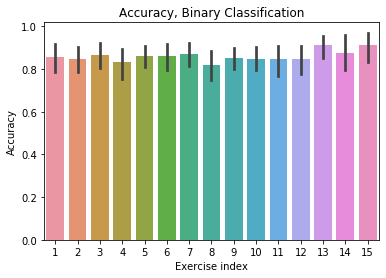

In [45]:
sns.barplot(data = pd.DataFrame(results_per_person_bin.drop(index = ['exer_idx', 'average'], columns =['stage']).values, 
                    columns = results_per_person_bin.T['exer_idx'].values[:15].astype(np.int))
)
plt.title("Accuracy, Binary Classification")
plt.xlabel('Exercise index')
plt.ylabel('Accuracy')

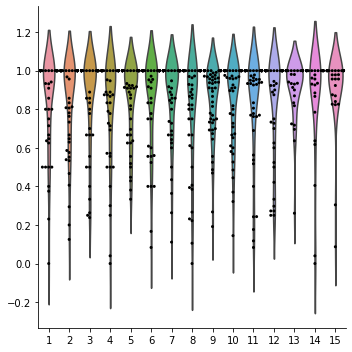

In [47]:
g = sns.catplot( kind="violin", inner=None, 
                data = pd.DataFrame(results_per_person_bin.drop(index = ['exer_idx', 'average'], columns =['stage']).values, 
                    columns = results_per_person_bin.T['exer_idx'].values[:15].astype(np.int))
                )
sns.swarmplot(color="k", size=3, 
              data = pd.DataFrame(results_per_person_bin.drop(index = ['exer_idx', 'average'], 
                                                              columns =['stage']).values, 
                                              columns = results_per_person_bin.T['exer_idx'].values[:15].astype(np.int)),
        ax=g.ax)

In [255]:
class two_step_classifier():
    
    def __init__(self, clf, params = {}):
        self.first_clf = clf(**params)
        self.second_clf = clf(**params)
        
    def fit(self, X, y):
        
#         y_first = np.array(y > 1.5, dtype = np.int)
#         print(y_first)
        self.first_clf.fit(X, y)
        indexes = np.argwhere(y.values > 0.5)[:,0]
#         print(X.shape, y.shape)
        X_s = X[indexes]
        y_s = y.values[indexes]
#         print(y_s)
        
        self.second_clf.fit(X_s, y_s)
        
    def predict(self, X):
        y_pred = self.first_clf.predict(X)
        indexes = np.argwhere(y_pred > 0.5)[:,0]
#         print(y_pred)
        if len(indexes) != 0:
            y_pred[indexes] = self.second_clf.predict(X[indexes])
        
        return y_pred

In [267]:
train_df = shuffler(Parkinson_total_df[Parkinson_total_df['name'] != 1])
test_df  = Parkinson_total_df[Parkinson_total_df['name'] == 1]
results = pm.predict(train_df,test_df, 
                                   {'t2c' : t2c}, 
                                   balanced_accuracy= False).sort_values('exer_idx')

predict the parkinson stage


In [268]:
results

,exer_idx,train_len,test_len,t2c
3,1,413,7,1.000000
4,2,1351,32,1.000000
11,3,348,2,1.000000
5,4,447,8,1.000000
6,5,628,13,0.692308
7,6,745,13,1.000000
8,7,617,6,1.000000
9,8,1473,31,0.935484
10,9,5036,84,1.000000
0,10,1971,33,1.000000


In [261]:
X = Parkinson_total_df.drop(columns=['target', 'name', 'exercise_index'])
y = Parkinson_total_df['target']
t2c = two_step_classifier(RandomForestClassifier, { 'class_weight' : 'balanced', 'max_depth' : 5, 'n_estimators' : 30})

In [262]:
t2c.fit(X.values[:10000], y[:10000])

In [263]:
pm.accuracy_score(t2c.predict(X.values[10000:]) ,y.values[10000:])

0.4123403747463898

In [264]:
t2c.predict(X.values[:100])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 4., 4., 4., 4., 4., 1.,
       1., 1., 1., 1., 4., 4., 1., 1., 1., 1., 0., 0., 4., 1., 0., 1., 1.,
       4., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 4., 1., 1., 1., 1., 1.])

In [237]:
pm.accuracy_score(t2c.predict(X.values) ,y.values)

0.47956907339898797

In [202]:
Parkinson_total_df.isna().sum().sum()

0

In [203]:
indexes = np.argwhere(y.values > 1)[:,0]

In [269]:
peoples = Parkinson_total_df.name.unique()
results_per_person_t2c = pd.DataFrame()

for i in peoples:
    print(i)
#     i = 6
    train_df = shuffler(Parkinson_total_df[Parkinson_total_df['name'] != i])
    test_df  = Parkinson_total_df[Parkinson_total_df['name'] == i]
    results = pm.predict(train_df,test_df, 
                                       {'t2c': t2c}, 
                                       balanced_accuracy= False).sort_values('exer_idx')
    results_temp = pd.DataFrame()
    results_temp['exer_idx'] = results['exer_idx']
    results_temp[i] = results.drop(columns = ['exer_idx', 'train_len', 'test_len']).max(axis = 1)
    if i == peoples[0]:
        results_per_person_t2c = results_temp.copy()
    else:
        results_per_person_t2c = pd.merge(results_per_person_t2c, results_temp, how = 'outer')
#     break

55
predict the parkinson stage
53
predict the parkinson stage
20
predict the parkinson stage
5
predict the parkinson stage
43
predict the parkinson stage
12
predict the parkinson stage
33
predict the parkinson stage
8
predict the parkinson stage
37
predict the parkinson stage
52
predict the parkinson stage
28
predict the parkinson stage
35
predict the parkinson stage
18
predict the parkinson stage
62
predict the parkinson stage
15
predict the parkinson stage
57
predict the parkinson stage
11
predict the parkinson stage
50
predict the parkinson stage
3
predict the parkinson stage
4
predict the parkinson stage
19
predict the parkinson stage
60
predict the parkinson stage
56
predict the parkinson stage
7
predict the parkinson stage
39
predict the parkinson stage
59
predict the parkinson stage
51
predict the parkinson stage
31
predict the parkinson stage
9
predict the parkinson stage
54
predict the parkinson stage
22
predict the parkinson stage
32
predict the parkinson stage
40
predict the

In [274]:
results

,exer_idx,train_len,test_len,t2c
6,1,415,5,0.200000
7,2,1357,26,0.500000
8,3,343,7,0.857143
9,4,443,12,0.500000
10,5,639,2,0.000000
11,6,748,10,0.500000
12,7,617,6,1.000000
13,8,1501,3,0.000000
14,9,5058,62,0.596774
0,10,1996,8,0.625000


In [270]:
stage = []
results_per_person_t2c['average'] = results_per_person_t2c.drop(columns=['exer_idx']).mean(axis = 1)
for col in results_per_person_t2c.columns:
    if col in ['exer_idx', 'average']:
        stage.append(np.NaN)
        continue
#     print(col)
    stage.append(Parkinson_total_df[Parkinson_total_df['name'] == col]['target'].iloc[0])
results_per_person_t2c = results_per_person_t2c.T
results_per_person_t2c['stage'] = stage
results_per_person_t2c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,stage
exer_idx,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,NaN
55,0.000000,0.000000,0.000000,0.000000,0.131579,0.000000,0.000000,0.062500,0.200000,0.409091,0.000000,0.000000,0.046512,0.021277,0.423077,1.0
53,0.636364,0.800000,0.666667,0.500000,0.625000,0.727273,0.647059,0.344828,0.712389,0.950000,0.864865,0.560000,1.000000,1.000000,0.916667,2.0
20,0.363636,0.514286,0.222222,0.333333,0.000000,0.320000,0.043478,0.160000,0.045685,0.454545,0.170732,0.090909,NaN,NaN,NaN,2.0
5,0.888889,1.000000,1.000000,0.833333,1.000000,1.000000,0.916667,1.000000,0.957895,0.833333,0.933333,1.000000,NaN,NaN,NaN,0.0
43,0.470588,0.470588,0.666667,0.842105,0.454545,0.681818,0.571429,0.225806,0.634328,0.609756,0.733333,0.090909,0.981481,0.744186,0.854167,2.0
12,0.833333,1.000000,1.000000,1.000000,0.875000,1.000000,1.000000,0.967742,0.987952,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.0
33,0.285714,0.000000,0.750000,0.263158,0.214286,0.000000,0.181818,0.303030,0.204082,0.212121,0.153846,0.000000,0.568182,0.000000,0.195652,2.0
8,1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,1.000000,1.000000,0.977778,1.000000,0.961538,1.000000,NaN,NaN,NaN,0.0
37,1.000000,0.333333,0.400000,0.750000,0.666667,0.545455,0.166667,0.294118,0.266667,0.638889,0.629630,0.000000,0.103448,0.136364,0.352941,2.0


In [272]:
loo_report_t2c = pd.DataFrame()
loo_report_t2c['health person t2cary'] = results_per_person_t2c[results_per_person_t2c['stage'] == 0].mean().values
loo_report_t2c['Sick person t2cary'] = results_per_person_t2c[results_per_person_t2c['stage'] == 1].mean().values
loo_report_t2c['accuracy t2cary'] = results_per_person_t2c.T['average']
l_min, l_max = CI_calculated(results_per_person_t2c)
loo_report_t2c['accuracy t2cary CI min'] = l_min
loo_report_t2c['accuracy t2cary CI max'] = l_max
loo_report_t2c['exercise index'] = results_per_person_t2c.T['exer_idx']
loo_report_t2c

,health person t2cary,Sick person t2cary,accuracy t2cary,accuracy t2cary CI min,accuracy t2cary CI max,exercise index
0,0.885749,0.205556,0.593287,0.485646,0.700928,1.0
1,0.888138,0.154835,0.577660,0.466634,0.688686,2.0
2,0.933333,0.223977,0.626990,0.525000,0.728980,3.0
3,0.859369,0.075812,0.566972,0.462252,0.671692,4.0
4,0.817702,0.260070,0.525868,0.424397,0.627338,5.0
5,0.931038,0.112963,0.591594,0.492316,0.690871,6.0
6,0.894082,0.194796,0.544026,0.444660,0.643391,7.0
7,0.869916,0.116041,0.531582,0.420595,0.642569,8.0
8,0.862512,0.276710,0.597029,0.508196,0.685863,9.0
9,0.870243,0.327120,0.584167,0.489116,0.679218,10.0


In [41]:
parkinson_or_not_df = Parkinson_total_df[Parkinson_total_df.target != 0]
parkinson_or_not_df.target = np.array(parkinson_or_not_df.target > 3, np.int)

In [42]:
def small_predict(train_features, test_features, classifiers):
    X_train = train_features
    X_test  = test_features
    y_train = X_train['target'].values
    y_test  = X_test['target'].values

    X_train = X_train.drop(columns= ['target'])
    X_test  = X_test.drop(columns= ['target'])

    X_train = pm.sclr.fit_transform(X_train)
    X_test  = pm.sclr.transform(X_test)
    df = pd.DataFrame()
    df['train_len'] = [len(y_train)]
    df['test_len'] = [len(y_test)]
#     print(y_test.shape, y_train.shape)
    for key in classifiers:
#         print(key)
        model = classifiers[key]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
#         print(len(y_pred))
        df[key] = [accuracy_score(y_pred, y_test)]

    return df

In [44]:
parkinson_or_not_df.target.unique()

array([0, 1], dtype=int64)

In [47]:
from tqdm import tqdm


In [48]:
result_df = pd.DataFrame()
for exercise in parkinson_or_not_df.exercise_index.unique():
    df = parkinson_or_not_df[parkinson_or_not_df.exercise_index == exercise]
    result = pd.DataFrame()
    for  person in tqdm(df.name.unique()):
#         print(i)
        X_train = df[df.name != person]
        X_test  = df[df.name == person]
        result = result.append(small_predict(X_train, X_test, classifiers), ignore_index = True)
#         break
    result = pd.DataFrame(result.mean()).T
    result['exercise_index'] = exercise
    print(exercise)
    result_df = result_df.append(result, ignore_index = True)
#     break

 12%|██████████                                                                         | 4/33 [00:37<04:33,  9.43s/it]

KeyboardInterrupt: 

In [ ]:
result_df[['RF', 'Linear SVM','rbf SVM','KNN','LR','Adaboost','SGD']].max(axis = 1)

In [26]:
parkinson_stage_df = Parkinson_total_df[Parkinson_total_df.target != 0]
parkinson_stage_df = parkinson_stage_df[parkinson_stage_df.target != 4]
parkinson_stage_df.target = np.array(parkinson_stage_df.target > 1.5, np.int)

In [37]:
result_df = pd.DataFrame()
for exercise in parkinson_stage_df.exercise_index.unique():
    df = parkinson_stage_df[parkinson_stage_df.exercise_index == exercise]
    result = pd.DataFrame()
    for i, person in enumerate(df.name.unique()):
        print(i)
        X_train = df[df.name != person]
        X_test  = df[df.name == person]
        result = result.append(small_predict(X_train, X_test, classifiers), ignore_index = True)
#         break
#     result = pd.DataFrame(result.mean()).T
#     result['exercise_index'] = exercise
#     print(exercise)
#     result_df = result_df.append(result, ignore_index = True)
    break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [39]:
result.mean()

train_len     912.960000
test_len       38.040000
RF 30 5         0.518489
RF 50 5         0.505158
RF 70 5         0.500081
RF 90 5         0.525620
RF 30 15        0.580240
RF 50 15        0.583874
RF 70 15        0.583464
RF 90 15        0.584503
RF 30 25        0.539780
RF 50 25        0.568979
RF 70 25        0.566958
RF 90 25        0.579429
RF 110 35       0.572201
Linear SVM      0.466365
rbf SVM         0.516304
KNN             0.503704
LR              0.385553
Adaboost        0.521431
SGD             0.497311
dtype: float64

In [25]:
parkinson_stage_df.target.unique()

array([1, 2], dtype=int64)

In [152]:
t2c.first_clf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

10
11
12
13
14
15
1
2
3
4
5
6
7
8
9


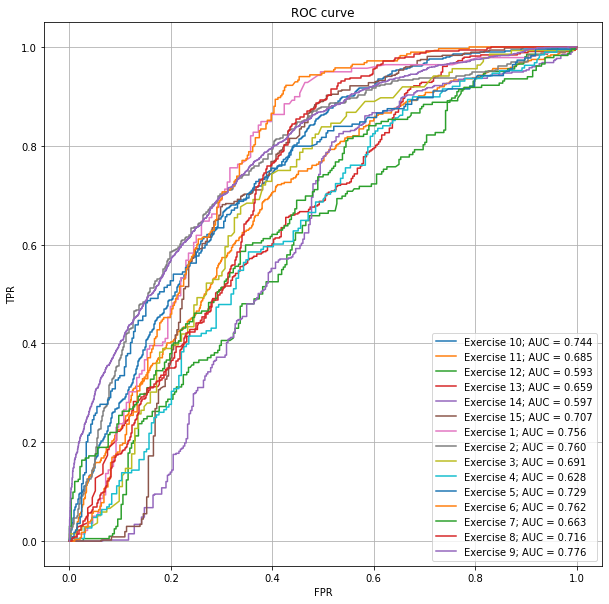

In [303]:
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
def get_roc_curve(proba, y_true):
    y_pred = proba[:,1] #np.exp(lines[:,0])/(np.exp(lines[:,1]) + np.exp(lines[:,0])) 
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_value = auc(fpr, tpr)
    return fpr, tpr, auc_value
plt.figure(figsize=(10,10))
plt.title('ROC curve')
RFC = RandomForestClassifier(n_estimators= 50, max_depth= 10, class_weight='balanced')
plt.ylabel('TPR')
plt.xlabel('FPR')
peoples = Parkinson_total_df_bin['name'].unique()
for exer in Parkinson_total_df_bin['exercise_index'].unique():
    print(exer)
    for i in peoples:
        
        train_df = Parkinson_total_df_bin[Parkinson_total_df_bin['exercise_index'] == exer][Parkinson_total_df_bin['name'] != i].drop(columns = ['name','exercise_index'])
        test_df  = Parkinson_total_df_bin[Parkinson_total_df_bin['exercise_index'] == exer][Parkinson_total_df_bin['name'] == i].drop(columns = ['name','exercise_index'])
        if len(test_df) == 0:
            continue
        RFC.fit(train_df.drop(columns = ['target']), train_df['target'])
        proba = RFC.predict_proba(test_df.drop(columns = ['target']))
        if i == peoples[0]:
            total_proba = proba
            total_true  = test_df['target'].values
        else:
            total_proba = np.vstack((total_proba, proba))
            total_true  = np.hstack((total_true , test_df['target'].values))
    fpr, tpr, auc_value = get_roc_curve(total_proba, total_true)
    plt.plot(fpr, tpr, label = 'Exercise ' + str(exer) + '; AUC = ' + str(auc_value)[:5])
plt.legend(loc = 4)
plt.grid()
plt.show()

In [285]:
proba.shape

(221, 2)

In [274]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6]])

In [276]:
np.vstack((x, y))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [53]:
total_bin_results[8].drop(columns = ['exer_idx', 'train_len', 'test_len']).style.applymap(bin_color_negative_red)

,RF,Linear SVM,rbf SVM,poly SVM,KNN,NB,LR,DT,number of features
0,0.868595,0.877757,0.875198,0.890254,0.910506,0.883636,0.716938,0.360825,5
1,0.896267,0.904167,0.870958,0.872792,0.902199,0.932377,0.797802,0.359375,25
2,0.880425,0.852476,0.855434,0.863793,0.930612,0.932377,0.821926,0.358885,45
3,0.851828,0.828215,0.841984,0.722603,0.91596,0.934156,0.82935,0.359375,65
4,0.875627,0.843012,0.833333,0.722603,0.927126,0.934156,0.809052,0.359375,85
5,0.880425,0.855515,0.828211,0.722603,0.927126,0.934156,0.836354,0.359375,105
6,0.894275,0.855515,0.815469,0.722603,0.919911,0.932377,0.849383,0.359375,125
7,0.898251,0.849383,0.807218,0.722603,0.907445,0.921895,0.839722,0.359375,145
8,0.894275,0.867217,0.871479,0.722603,0.877253,0.934156,0.843012,0.359375,165
9,0.900228,0.861448,0.870175,0.722603,0.898644,0.928862,0.839722,0.359375,172


In [460]:
total_bin_results.to_csv('C:/Files/parkinson/BIN_RESULTS.csv', sep = ';')

In [86]:
features.columns

Index(['acc_x, mg_std', 'acc_x, mg_mean', 'acc_x, mg_skew',
       'acc_x, mg_differential_mean', 'acc_x, mg_differential_std',
       'acc_x, mg_std_without_trend', 'acc_x, mg_mean_without_trend',
       'acc_x, mg_noise_peaks_freq_mean', 'acc_x, mg_noise_peaks_freq_std',
       'acc_x, mg_noise_peaks_amplitude_mean',
       ...
       'mag_z, mga_noise_spectrum_energy_std',
       'mag_z, mga_trend_peaks_freq_mean', 'mag_z, mga_trend_peaks_freq_std',
       'mag_z, mga_trend_peaks_amplitude_mean',
       'mag_z, mga_trend_peaks_amplitude_std',
       'mag_z, mga_trend_spectrum_energy_mean',
       'mag_z, mga_trend_spectrum_energy_std', 'name', 'target',
       'exercise_index'],
      dtype='object', length=174)

In [40]:
features[features['name'] == name]['target'].iloc[0]

4

In [73]:
results_per_names = {}
for name in features['name'].unique():
    test  = features[features['name'] == name].drop(columns = [ 'name'])
    train = features[features['name'] != name].drop(columns = [ 'name'])
    if features[features['name'] == name]['target'].iloc[0] == 4:
        results = pm.predict(train, test, classifiers, parkinson_stage = False, balanced_accuracy = False)
    elif features[features['name'] == name]['target'].iloc[0] in [1,2,3]:
        results = pm.predict(train, test, classifiers, parkinson_stage = True, balanced_accuracy = False)
    else:
        continue
    results_per_name = pd.DataFrame()
    results_per_name['accuracy'] = results.drop(columns = ['exer_idx', 'train_len', 'test_len']).T.max(axis = 0)
    #['RF', 'Linear SVM', 'rbf SVM', 'poly SVM', 'KNN', 'NB', 'LR', 'DT']].T.max(axis = 0)
    results_per_name['exercise'] = results['exer_idx']
    results_per_name['train_len'] = results['train_len']
    results_per_name['test_len'] = results['test_len']
    results_per_names[name] = np.array([np.NAN]*15)
    results_per_names[name][results['exer_idx'].values - 1] = results_per_name['accuracy']


predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict other tremors
predict other tremors
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict other tremors
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict other tremors
predict other tremors
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage
predict the parkinson stage


In [107]:
info['Степень Паркинсона'].value_counts()

-1          25
П(2)        14
П(1)         9
П(3)         5
тремор       5
здоровая     3
здоров       1
Name: Степень Паркинсона, dtype: int64

In [87]:
diagnos = []
dct = {0 : 0, 'П(2)' : 2, 'П(3)' : 3, 'тремор' : 4, 'П(1)' : 1}
for key in results_per_names:
    value = info[info['ID'] == key]['Степень Паркинсона'].values[0]
    diagnos.append(dct[value])

In [104]:
result_per_person = pd.DataFrame(results_per_names).T
result_per_person['target'] = diagnos
result_per_person[result_per_person['target'] == 3].style.applymap(bin_color_negative_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
49,0,0.0526316,0.125,0.181818,0.133333,0.105263,0.111111,0.466667,0.358974,0.236842,0,0.0555556,0.0357143,0.16,0,3
21,nan,0.409091,nan,0.75,0.470588,0.214286,0.428571,0,0.358696,0.84,0.047619,0.533333,nan,nan,nan,3
44,0.2,0.2,0.5,0.583333,0.368421,0.25,0.294118,0,0.0674157,0.8,0.0909091,0,nan,nan,nan,3
48,0.625,0.157895,0.285714,0.230769,0.333333,0.266667,0.142857,0.75,0,0.73913,0,0.25,0.0416667,0.111111,0.0416667,3


In [108]:
features.shape

(18543, 174)

In [101]:
results_per_stage = {}
for i in range(1,5):
    values = result_per_person[result_per_person['target'] == i][[1,2,3,4,5,6,7,8,9,10,11,12,13,14]].mean().values
    results_per_stage[i] = list(values)

In [103]:
pd.DataFrame(results_per_stage).style.applymap(color_negative_red)

,1,2,3,4
0,0.786482,0.590986,0.204904,0.958525
1,0.433333,0.782313,0.303571,0.610606
2,0.311417,0.859707,0.43648,0.790152
3,0.509677,0.489167,0.326419,0.848667
4,0.371527,0.668391,0.209054,0.823053
5,0.313224,0.889982,0.244164,0.710961
6,0.44027,0.55578,0.304167,0.689718
7,0.430568,0.599708,0.196271,0.672755
8,0.317465,0.636507,0.653993,0.602805
9,0.304381,0.699551,0.034632,0.775118


In [76]:
results_per_names, results['exer_idx'].values, name

({1: array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,
         nan, nan])},
 array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 1)

In [58]:
test['exercise_index'].unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [61]:
results_per_name = pd.DataFrame()
results_per_name['accuracy'] = results[['RF', 'Linear SVM', 'rbf SVM', 'poly SVM', 'KNN', 'NB', 'LR', 'DT']].T.max(axis = 0)
results_per_name['exercise'] = results['exer_idx']
results_per_name['train_len'] = results['train_len']
results_per_name['test_len'] = results['test_len']

In [67]:
results_per_name

,accuracy,exercise,train_len,test_len
0,1.0,10,1697,35
1,1.0,11,1379,33
2,1.0,12,561,8
3,1.0,1,391,9
4,1.0,2,1237,34
5,1.0,3,370,4
6,1.0,4,455,10
7,1.0,5,655,15
8,1.0,6,718,15
9,1.0,7,599,8


In [42]:
results#[['RF', 'Linear SVM', 'rbf SVM', 'poly SVM', 'KNN', 'NB', 'LR', 'DT', 'GaussProcess', 'QDA']]

,exer_idx,train_len,test_len,RF,Linear SVM,rbf SVM,poly SVM,KNN,NB,LR,DT
0,10,1697,35,0.500000,0.500000,1.0,1.0,0.333333,0.333333,1.000000,0.500000
1,11,1379,33,0.500000,1.000000,0.5,1.0,1.000000,0.333333,1.000000,0.333333
2,12,561,8,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
3,1,391,9,0.500000,0.500000,0.5,1.0,1.000000,0.333333,0.500000,0.333333
4,2,1237,34,1.000000,0.500000,1.0,1.0,0.500000,0.500000,0.500000,0.333333
5,3,370,4,1.000000,0.500000,0.5,0.0,1.000000,1.000000,0.500000,1.000000
6,4,455,10,1.000000,1.000000,0.0,0.0,0.500000,0.500000,1.000000,0.500000
7,5,655,15,1.000000,0.500000,0.5,1.0,0.333333,0.333333,0.500000,0.250000
8,6,718,15,1.000000,0.500000,1.0,1.0,0.500000,1.000000,0.500000,0.333333
9,7,599,8,1.000000,1.000000,1.0,0.0,0.333333,0.500000,0.333333,0.333333


In [102]:
RFC = RandomForestClassifier(n_estimators= 50, max_depth= 10)

In [107]:
Parkinson_total_df = Parkinson_total_df = features[(features['target'] != 4) * (features['target'] != 3)]

In [114]:
train_features.target.unique()

array([1, 0, 2], dtype=int64)

In [ ]:
from sklearn.metrics import roc_curve, auc
def get_roc_curve(proba, y_true):
    y_pred = proba[:,1] #np.exp(lines[:,0])/(np.exp(lines[:,1]) + np.exp(lines[:,0])) 
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_value = auc(fpr, tpr)
    return fpr, tpr, auc_value
plt.figure(figsize=(10,10))
plt.title('ROC curve')

plt.ylabel('TPR')
plt.xlabel('FPR')
for i in train_features['exercise_index'].unique():
    X_train = train_features[train_features['exercise_index'] == i].drop(columns = ['target','name','exercise_index'])
    y_train = np.array(train_features[train_features['exercise_index'] == i]['target'] > 1.5)
    X_test  = test_features[test_features['exercise_index'] == i].drop(columns = ['target','name','exercise_index'])
    y_test = np.array(test_features[test_features['exercise_index'] == i]['target'] > 1.5)
    RFC.fit(X_train, y_train)
    proba = RFC.predict_proba(X_test)
    fpr, tpr, auc_value = get_roc_curve(proba, y_test)
    plt.plot(fpr, tpr, label = 'Exercise ' + str(i) + '; AUC = ' + str(auc_value)[:5])
plt.legend(loc = 4)
plt.grid()

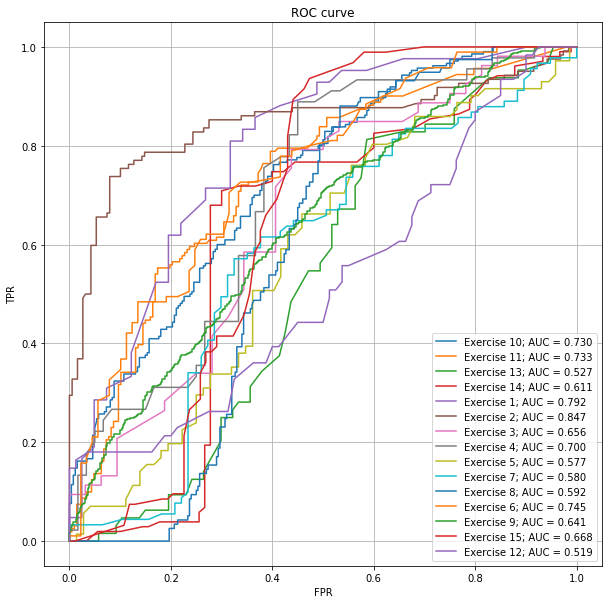

In [134]:
plt.figure(figsize=(10,10))
plt.title('ROC curve')

plt.ylabel('TPR')
plt.xlabel('FPR')
for i in train_features['exercise_index'].unique():
    X_train = train_features[train_features['exercise_index'] == i].drop(columns = ['target','name','exercise_index'])
    y_train = np.array(train_features[train_features['exercise_index'] == i]['target'] > 1.5)
    X_test  = test_features[test_features['exercise_index'] == i].drop(columns = ['target','name','exercise_index'])
    y_test = np.array(test_features[test_features['exercise_index'] == i]['target'] > 1.5)
    RFC.fit(X_train, y_train)
    proba = RFC.predict_proba(X_test)
    fpr, tpr, auc_value = get_roc_curve(proba, y_test)
    plt.plot(fpr, tpr, label = 'Exercise ' + str(i) + '; AUC = ' + str(auc_value)[:5])
plt.legend(loc = 4)
plt.grid()

In [125]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [0]:
for key in dct.keys()[:40]:
    if 'freq' in key:
        a = 1
    else:
        a = file_drop[key].max()
#     if 'trend' not in key:
    print(key, '\n',
          file_drop[file_drop['target'] == 0][key].mean()/a, file_drop[file_drop['target'] == 0][key].std()/a,
          file_drop[file_drop['target'] == 1][key].mean()/a, file_drop[file_drop['target'] == 1][key].std()/a)

10 acc_z, mg_noise_peaks_freq_mean 
 13.627850532531738 6.533305644989014 8.618415832519531 2.9156570434570312
7 acc_y, mg_trend_spectrum_energy_std 
 0.22983158 0.14937022 0.48228455 0.23345686
2 acc_y, mg_noise_peaks_freq_mean 
 4.4677414894104 1.2478324174880981 6.196413993835449 1.5221450328826904
6 acc_y, mg_trend_spectrum_energy_mean 
 0.31645054 0.12252478 0.52725786 0.1979433
7 acc_x, mg_trend_spectrum_energy_mean 
 0.21679673 0.09634453 0.39452282 0.17596163
10 acc_y, mg_noise_peaks_freq_mean 
 15.252882957458496 6.818573951721191 9.739928245544434 4.458822727203369
7 acc_z, mg_trend_spectrum_energy_mean 
 0.23103733 0.10016943 0.42059433 0.18073528
7 acc_z, mg_trend_spectrum_energy_std 
 0.11828394 0.07576683 0.296069 0.18046007
7 acc_y, mg_trend_spectrum_energy_mean 
 0.25191283 0.10451218 0.44377652 0.17705277
6 acc_x, mg_trend_spectrum_energy_std 
 0.13330491 0.08354062 0.33557042 0.23259775
6 acc_z, mg_trend_spectrum_energy_std 
 0.09954058 0.06146214 0.27015695 0.2207497

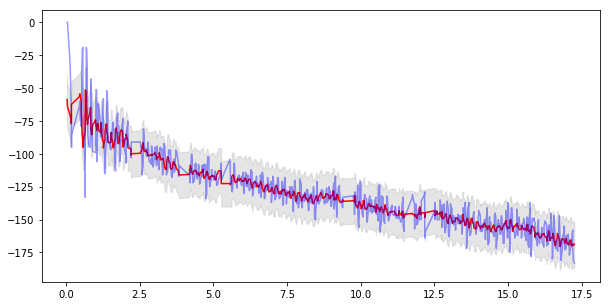

In [0]:
# os.mkdir("pic")
path = 'E:/parkinson/21'
patient = pm.parkinson(path)
patient.read()
pm.plot_mean_and_variance(patient.exercises[7]['acc_y, mg'], patient.time[7], l =1500)

In [0]:
pm.calculate_feature(patient.time[6], patient.exercises[6]['acc_y, mg'])

[0.01408513 0.01712187 0.04103065 ... 0.00111636 0.0177203  0.00148463]
[ 0.16521692  0.16601491  0.18337989 ... 35.26577059 35.2834909
 35.28497553]
[ 0.16521692  0.16601491  0.18337989 ... 35.26577059 35.2834909
 35.28497553]


{'std': 227.34473228417863,
 'mean': -487.9608399545971,
 'differential_mean': 158.23330007477404,
 'differential_std': 61271.26834666217,
 'std_without_trend': 135.44149682492235,
 'mean_without_trend': 135.44149682492235,
 'noise_peaks_freq_mean': 7.99910744998305,
 'noise_peaks_freq_std': 1.9700764010342224,
 'noise_peaks_amplitude_mean': 28041.323843713013,
 'noise_peaks_amplitude_std': 10410.29083594281,
 'noise_spectrum_energy_mean': 64385186.504132226,
 'noise_spectrum_energy_std': 214141513.41013288,
 'trend_spectrum_energy_mean': 963058492.760331,
 'trend_spectrum_energy_std': 49733091404.10661}

In [0]:
import scipy.signal as signal
a = (patient.exercises[7]['acc_y, mg'] - patient.exercises[7]['acc_y, mg'].rolling(window= 11).mean())[10:]
fft_data = np.abs(np.fft.fft(a))
fft_freq = np.fft.fftfreq(len(fft_data), 0.01)
peaks, _ = signal.find_peaks(fft_data, fft_data.mean() + 2*np.std(fft_data))

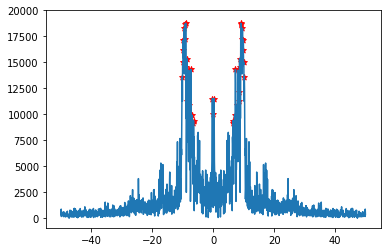

In [0]:
labels = np.argsort(fft_freq)
plt.plot(fft_freq[labels], fft_data[labels])
plt.scatter(fft_freq[peaks], fft_data[peaks], c = 'r', marker= '*')

In [0]:
peaks_label = np.argsort(np.abs(fft_freq[peaks]))
print(np.mean(np.abs(fft_freq[peaks])[peaks_label] [np.abs(fft_freq[peaks])[peaks_label] > 3]),
np.std(np.abs(fft_freq[peaks])[peaks_label] [np.abs(fft_freq[peaks])[peaks_label] > 3]))

8.508624005206945 1.1792700443917785


In [0]:
patient.exercises[7]['acc_y, mg']

0         0.0
1         0.0
2      -732.0
3      -764.0
4      -764.0
5      -740.0
6      -738.0
7      -753.0
8      -765.0
9      -802.0
10     -807.0
11     -795.0
12     -783.0
13     -768.0
14     -758.0
15     -748.0
16     -704.0
17     -692.0
18     -677.0
19     -702.0
20     -733.0
21     -781.0
22     -822.0
23     -863.0
24     -824.0
25     -795.0
26     -791.0
27     -776.0
28     -754.0
29     -746.0
        ...  
1759   -622.0
1760   -603.0
1761   -553.0
1762   -562.0
1763   -587.0
1764   -629.0
1765   -664.0
1766   -671.0
1767   -649.0
1768   -614.0
1769   -587.0
1770   -569.0
1771   -571.0
1772   -622.0
1773   -622.0
1774   -574.0
1775   -570.0
1776   -596.0
1777   -630.0
1778   -566.0
1779   -379.0
1780   -404.0
1781   -437.0
1782   -477.0
1783   -503.0
1784   -548.0
1785   -564.0
1786   -536.0
1787   -535.0
1788   -500.0
Name: acc_y, mg, Length: 1789, dtype: float64

In [0]:
os.chdir("C:/parkinson/21")
t_start = [0, 1000000, 30, 3.333, 5, 0, 0, 0, 37, 1000000, 6 , 20, 28]
len(t_start)

13

In [0]:
def ff(a):
    return np.mean(np.abs(a[1:] - a[:-1]))

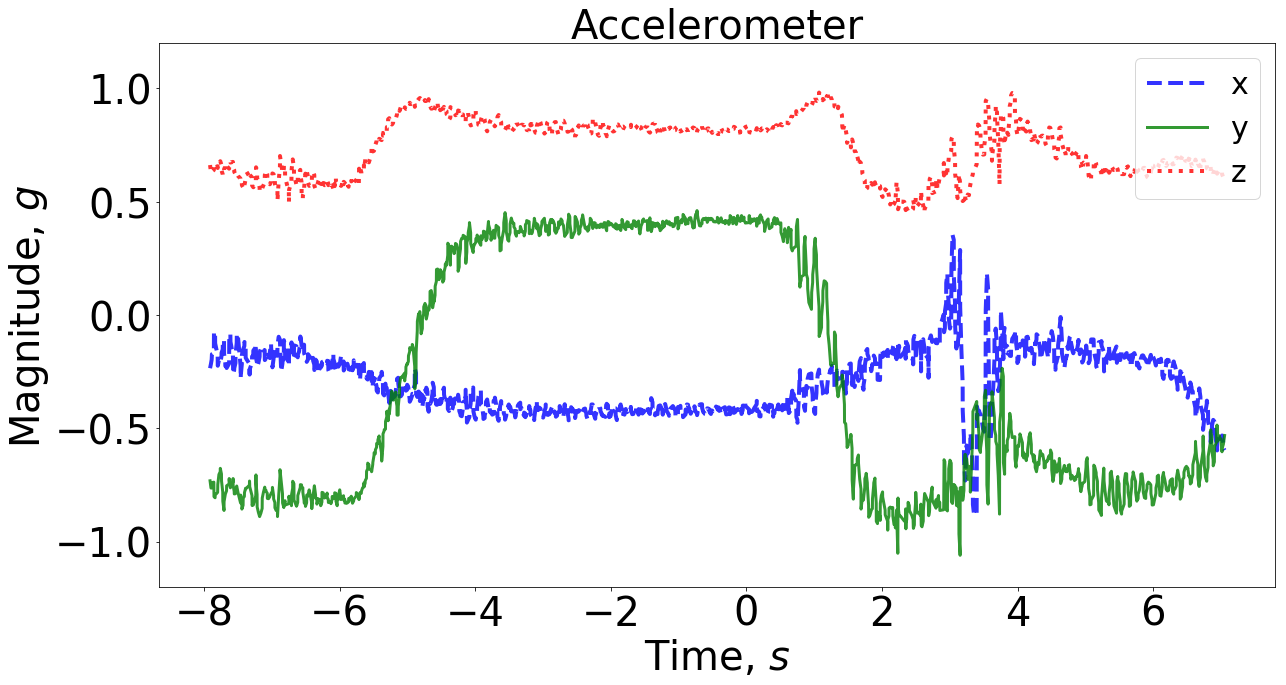

In [0]:
file_list = os.listdir()
for file in file_list:
    if (file[-4:] == '.csv'):
        ex = pd.read_csv(file) 
        if (file[3] != '_'):
            i = 10 + int(file[3])
        else:
            i = int(file[2])
        if i != 7:
            continue
        t = ex["time, s"]    
        l_i = np.argwhere(t > 0)
        #print(t_start[i-1])
        if (t_start[i-1]< 10000):
            #print(l_i[0][0], file)

            f = plt.figure(file[:-4], figsize= (20,10))
#             ax0= f.subplots(1,1)
            newex = ex[2:1500]
            plt.plot(newex["time, s"] - 8, newex["acc_x, mg"]/1000, '--b', linewidth = 4, label = 'x', alpha = 0.8)    
            plt.plot(newex["time, s"] - 8, newex["acc_y, mg"]/1000, 'g',   linewidth = 3, label = 'y', alpha = 0.8)    
            plt.plot(newex["time, s"] - 8, newex["acc_z, mg"]/1000, ':r',   linewidth = 4, label = 'z', alpha = 0.8)
            plt.title("Accelerometer", fontsize = 20*2)
            plt.legend(loc='upper right', fontsize = 15*2)
#                 ax0.legend(['x std %0.1f' %ff(newex["acc_x, mg"].values), 
#                             'y std %0.1f' %ff(newex["acc_y, mg"].values),
#                             'z std %0.1f' %ff(newex["acc_z, mg"].values)], loc = 1, fontsize = 12)
            plt.xlabel('Time, $s$', fontsize = 2*20)
            plt.ylabel('Magnitude, $g$', fontsize = 2*20)
            plt.ylim(-1.2, 1.2)
            plt.xticks(fontsize = 40)
            plt.yticks(fontsize = 40)

            plt.savefig('C:/Users/1/Desktop/illness.jpg')
#             ax1.plot(newex["time, s"], newex["gyr_x, dps"], c= 'b', label = 'x')    
#             ax1.plot(newex["time, s"], newex["gyr_y, dps"], c= 'g', label = 'y')    
#             ax1.plot(newex["time, s"], newex["gyr_z, dps"], c= 'r', label = 'z')
#             ax1.set_title("gyr")
            
#             ax2.plot(newex["time, s"], newex["mag_x, mga"], c= 'b', label = 'x')    
#             ax2.plot(newex["time, s"], newex["mag_y, mga"], c= 'g', label = 'y')    
#             ax2.plot(newex["time, s"], newex["mag_z, mga"], c= 'r', label = 'z')
#             ax2.set_title("mag")
#             os.chdir("C:/Users/1/Desktop/Parkinson/"+ str(21) + "/pic")
#             f.savefig(file[:4] + '_21.png')
#             os.chdir("C:/Users/1/Desktop/Parkinson/21")

In [0]:
parkinson = newex

In [0]:
os.chdir("E:/parkinson/16")
#t_start = [0, 1000000, 30, 3.333, 5, 0, 0, 0, 37, 1000000, 6 , 20, 28]
t_start = [0 for i in range(13)]
t_start
len(t_start)
file_list = os.listdir()
file_list

['ex10_2019-01-25 15_01_32.avi',
 'ex10_2019-01-25 15_01_32.wav',
 'ex10_2019-01-25 15_01_32_to_2019-01-25 15_02_24.csv',
 'ex11_2019-01-25 15_02_32.avi',
 'ex11_2019-01-25 15_02_32.wav',
 'ex11_2019-01-25 15_02_32_to_2019-01-25 15_03_30.csv',
 'ex12_2019-01-25 15_03_37.avi',
 'ex12_2019-01-25 15_03_37.wav',
 'ex12_2019-01-25 15_03_37_to_2019-01-25 15_04_25.csv',
 'ex13_2019-01-25 15_04_33.avi',
 'ex13_2019-01-25 15_04_33.wav',
 'ex13_2019-01-25 15_04_33_to_2019-01-25 15_04_48.csv',
 'ex1_2019-01-25 14_55_17.avi',
 'ex1_2019-01-25 14_55_17.wav',
 'ex1_2019-01-25 14_55_17_to_2019-01-25 14_55_31.csv',
 'ex2_2019-01-25 14_55_38.avi',
 'ex2_2019-01-25 14_55_38.wav',
 'ex2_2019-01-25 14_55_38_to_2019-01-25 14_56_23.csv',
 'ex3_2019-01-25 14_56_30.avi',
 'ex3_2019-01-25 14_56_30.wav',
 'ex3_2019-01-25 14_56_30_to_2019-01-25 14_56_41.csv',
 'ex4_2019-01-25 14_56_48.avi',
 'ex4_2019-01-25 14_56_48.wav',
 'ex4_2019-01-25 14_56_48_to_2019-01-25 14_56_57.csv',
 'ex5_2019-01-25 14_57_05.avi',
 'ex

10
11
12
13
1
2
3
4
5
6
7
8
9


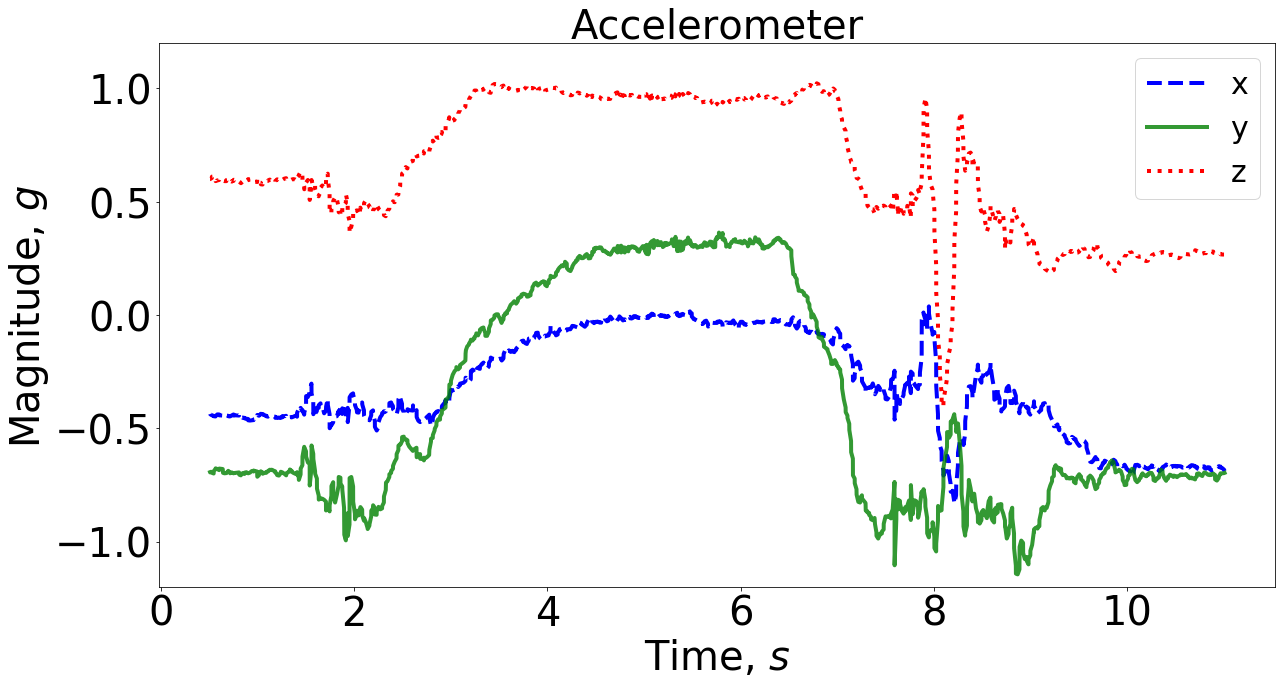

In [0]:
file_list = os.listdir()
for file in file_list:
    if (file[-4:] == '.csv'):
        ex = pd.read_csv(file) 
        if (file[3] != '_'):
            i = 10 + int(file[3])
        else:
            i = int(file[2])
        print(i)
        if i == 7:
            t = ex["time, s"]    
            l_i = np.argwhere(t > 8.5)
            #print(t_start[i-1])
            if (t_start[i-1]< 10000):
                #print(l_i[0][0], file)

                f = plt.figure(file[:-4], figsize= (10*2,2*5))
#                 ax0 = f.subplots(1,1)plt.figure(0, figsize=(10,5))
                newex = ex[l_i[0][0]:5500]
                plt.plot(newex["time, s"] - 8, newex["acc_x, mg"]/1000, '--b', linewidth = 4, label = 'x')    
                plt.plot(newex["time, s"] - 8, newex["acc_y, mg"]/1000, 'g',   linewidth = 4, label = 'y', alpha = 0.8)    
                plt.plot(newex["time, s"] - 8, newex["acc_z, mg"]/1000, ':r',   linewidth = 4, label = 'z')
                plt.title("Accelerometer", fontsize = 20*2)
                plt.legend(fontsize = 15*2)
#                 ax0.legend(['x std %0.1f' %ff(newex["acc_x, mg"].values), 
#                             'y std %0.1f' %ff(newex["acc_y, mg"].values),
#                             'z std %0.1f' %ff(newex["acc_z, mg"].values)], loc = 1, fontsize = 12)
                plt.xlabel('Time, $s$', fontsize = 2*20)
                plt.ylabel('Magnitude, $g$', fontsize = 2*20)
                plt.ylim(-1.2, 1.2)
                plt.xticks(fontsize = 40)
                plt.yticks(fontsize = 40)
                
                plt.savefig('C:/Users/1/Desktop/Healthy.jpg')
#                     ('b', 'g', 'r'), ('std' + str(np.std(newex["acc_x, mg"])), 
#                                              'std' + str(np.std(newex["acc_y, mg"])),
#                                              'std' + str(np.std(newex["acc_z, mg"])) ) )
#                 ax1.plot(newex["time, s"], newex["gyr_x, dps"], c= 'b', label = 'x')    
#                 ax1.plot(newex["time, s"], newex["gyr_y, dps"], c= 'g', label = 'y')    
#                 ax1.plot(newex["time, s"], newex["gyr_z, dps"], c= 'r', label = 'z')
#                 ax1.set_title("gyr")

#                 ax2.plot(newex["time, s"], newex["mag_x, mga"], c= 'b', label = 'x')    
#                 ax2.plot(newex["time, s"], newex["mag_y, mga"], c= 'g', label = 'y')    
#                 ax2.plot(newex["time, s"], newex["mag_z, mga"], c= 'r', label = 'z')
#                 ax2.set_title("mag")
    #             os.chdir("C:/Users/1/Desktop/Parkinson/"+ str(21) + "/pic")
    #             f.savefig(file[:4] + '_21.png')
    #             os.chdir("C:/Users/1/Desktop/Parkinson/21")

In [0]:
health = newex

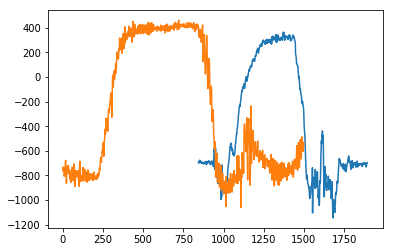

In [0]:
plt.plot(health['acc_y, mg'])
plt.plot(parkinson['acc_y, mg'])

In [0]:
parkinson.values.shape

(1498, 10)

In [0]:
signal.ricker()

TypeError: ricker() missing 2 required positional arguments: 'points' and 'a'

In [0]:
def sin(w):
    x = np.linspace(-np.pi, np.pi, num = 50)
    return np.sin(2*np.pi*w*x)
sign = np.array()
for i,w in enumerate(np.arange(1, 11, 0.1)):
    sinus = sin(len(parkinson['acc_y, mg'], w)
    sign[i] = signal.correlate(parkinson['acc_y, mg'], sinus)
plt.imshow(sign, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

SyntaxError: invalid syntax (<ipython-input-15-acbb12564cb6>, line 7)

In [0]:
N = 10
x_filt_h = health['acc_y, mg'].rolling(window=N + 1)
x_filt_h_mean = x_filt_h.mean()/1000
x_filt_p = parkinson['acc_y, mg'].rolling(window=N + 1)
x_filt_p_mean = x_filt_p.mean()/1000
std_h = (health['acc_y, mg']/1000 - x_filt_h_mean)[N:]
# std_h = np.clip(std_h, -500, 500)
std_p = (parkinson['acc_y, mg']/1000 - x_filt_p_mean)[N:]
# std_p = np.clip(std_p, -500, 500)


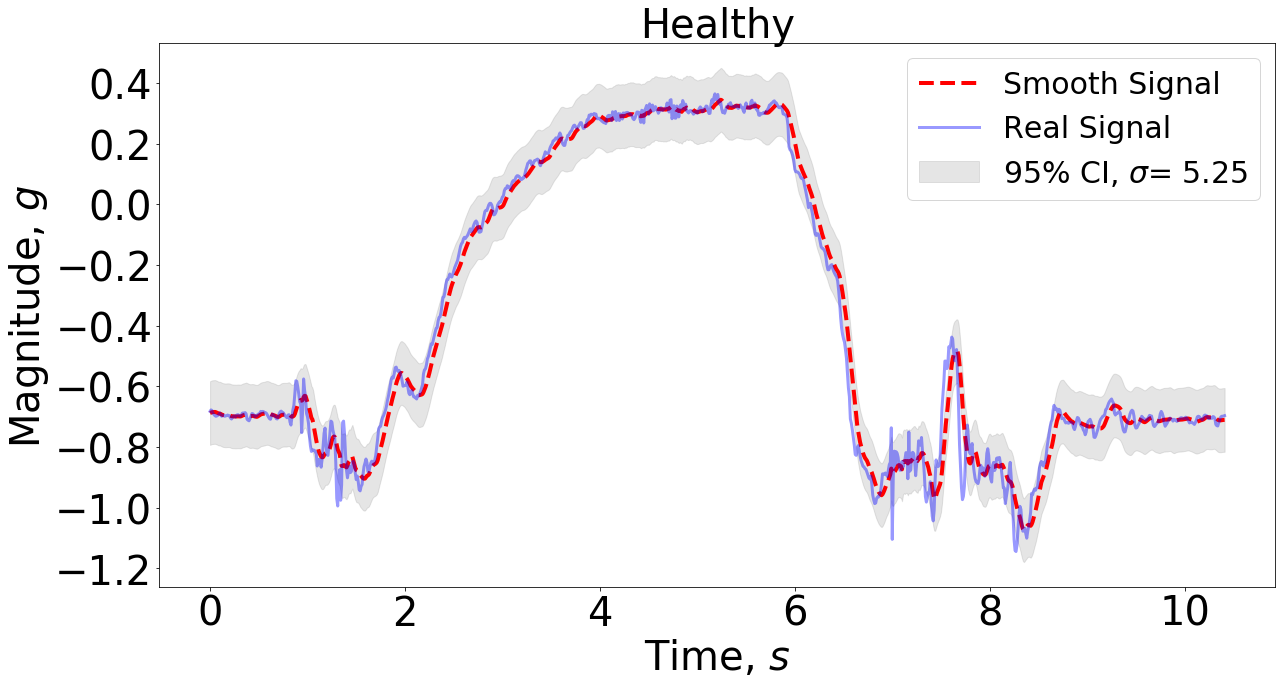

In [0]:
std = np.std(std_h)*len(std_h)/(len(std_h)-1)
plt.figure(0, figsize=(10*2,2*5))
plt.plot(np.arange(len(health['acc_y, mg']) - N)/100, x_filt_h_mean[N:],  '--r', linewidth = 4,  label = 'Smooth Signal')
plt.fill_between(np.arange(len(health['acc_y, mg']) - N)/100, x_filt_h_mean[N:] - 2*std, x_filt_h_mean[N:] + 2*std , color = 'grey', alpha = 0.2, 
                 label = '95% CI, $\sigma$'+ '= %.2f' % (100*std))
plt.plot(np.arange(len(health['acc_y, mg']) - N)/100, health['acc_y, mg'][N:]/1000, c = 'b', linewidth = 3, label = 'Real Signal', alpha= 0.4)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title('Healthy', fontsize = 40)
plt.xlabel("Time, $s$", fontsize = 40)
plt.ylabel("Magnitude, $g$", fontsize = 40)
plt.legend(fontsize = 30)

plt.savefig('C:/Users/1/Desktop/Health.jpg')

# plt.figure(1, figsize = (10,5))
# plt.plot(np.arange(len(health['acc_y, mg']) - N)[600:700], x_filt_h_mean[600:700], c = 'r', label = 'Smooth Signal')
# plt.fill_between(np.arange(len(health['acc_y, mg']) - N)[600:700], x_filt_h_mean[600:700] - 2*std, x_filt_h_mean[600:700] + 2*std , color = 'grey', alpha = 0.2, 
#                  label = '95% CI, $\sigma$ =' +  str(round(std)))
# plt.plot(np.arange(len(health['acc_y, mg']) - N)[600:700], health['acc_y, mg'][600:700], c = 'b', label = 'Real Signal', alpha= 0.4)

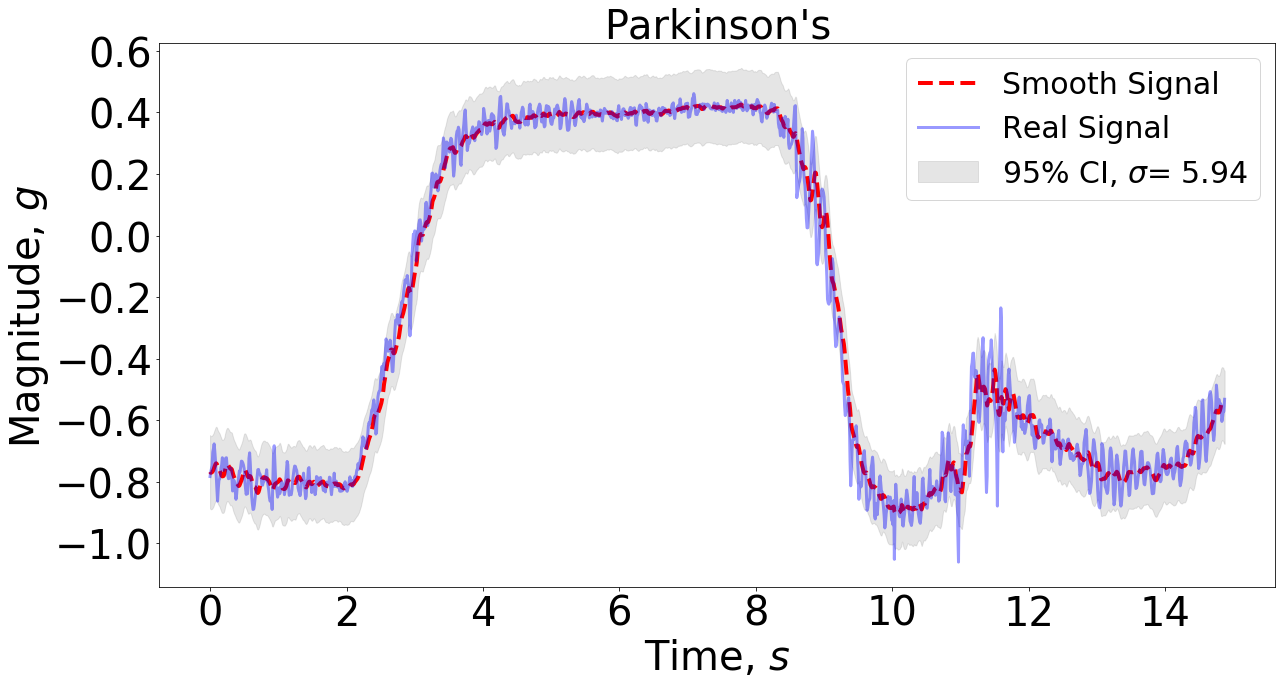

In [0]:
std = np.std(std_p)*len(std_p)/(len(std_p)-1)
plt.figure(0, figsize=(10*2,10))
plt.plot(np.arange(len(parkinson['acc_y, mg']) - N)/100, x_filt_p_mean[N:], '--r', linewidth = 4, label = 'Smooth Signal')
plt.fill_between(np.arange(len(parkinson['acc_y, mg']) - N)/100, x_filt_p_mean[N:] - 2*std, x_filt_p_mean[N:] + 2*std , color = 'grey', alpha = 0.2, 
                 label = '95% CI, $\sigma$'+ '= %.2f' % (100*std))
plt.plot(np.arange(len(parkinson['acc_y, mg']) - N)/100, parkinson['acc_y, mg'][N:]/1000, 'b', linewidth = 3, label = 'Real Signal', alpha = 0.4)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title("Parkinson's", fontsize = 40)
plt.xlabel("Time, $s$", fontsize = 40)
plt.ylabel("Magnitude, $g$", fontsize = 40)
plt.legend(fontsize = 30)

plt.savefig("C:/Users/1/Desktop/Parkinson.jpg")


1042 1042
1042 1042
-0.09399999999999231 1.0676363636363622
0.033449310766009425 0.04023228250244379


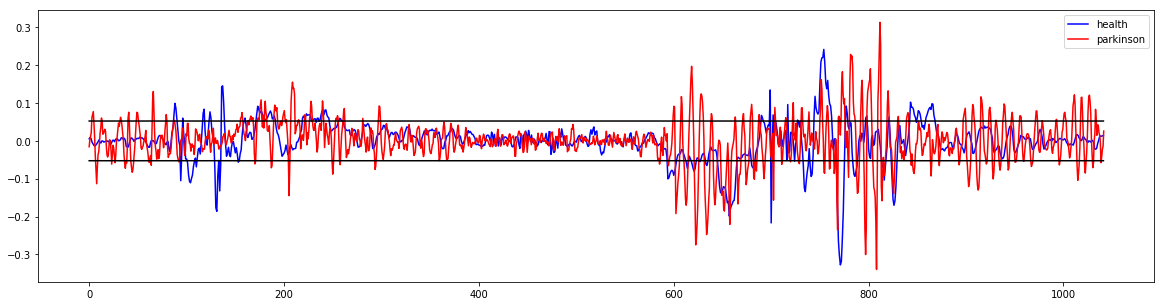

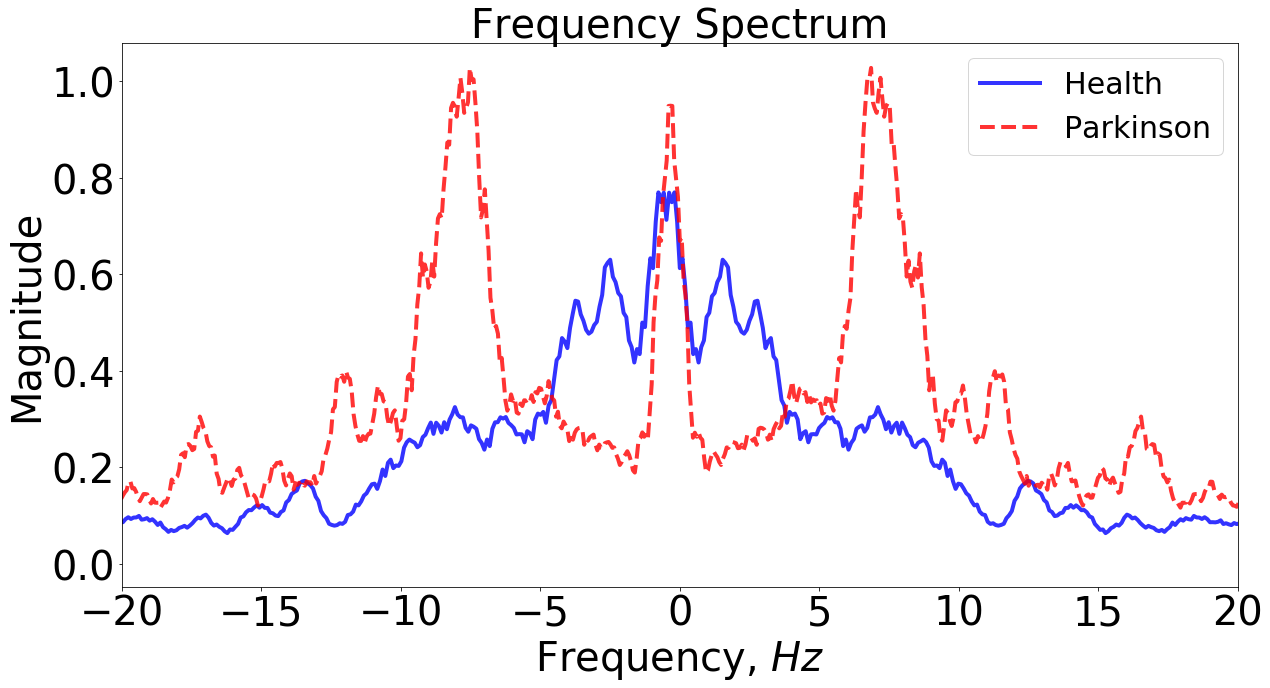

In [0]:
plt.figure(1, figsize= (20,5))
plt.plot(np.arange(len(std_h)), std_h, c = 'b', label = 'health')
plt.plot(np.arange(len(std_p))*len(std_h)/len(std_p), std_p, c = 'r', label = 'parkinson')
plt.plot(np.arange(len(std_h)), np.zeros(len(std_h)) + np.std(std_h), c = 'black')
plt.plot(np.arange(len(std_h)), np.zeros(len(std_h)) - np.std(std_h), c = 'black')
plt.legend()
plt.figure(2, figsize= (20,10))
fft_noise_h = np.fft.fft(std_h)
fft_noise_p = np.fft.fft(std_p)
freq_noise_h = np.fft.fftfreq(len(fft_noise_h), 0.01)
freq_noise_p = np.fft.fftfreq(len(fft_noise_p), 0.01)
labels_noise_h = np.argsort(freq_noise_h)
labels_noise_p = np.argsort(freq_noise_p)
print(len(freq_noise_h), len(fft_noise_h))
conv = np.convolve(np.abs(fft_noise_h)[labels_noise_h], np.ones(11)/11)[10:]
a = 1.3*conv.max()
print(len(conv), len(labels_noise_h))
plt.plot(freq_noise_h[labels_noise_h], conv/a, 'b', linewidth = 4, alpha = 0.8, label = 'Health')
conv = np.convolve(np.abs(fft_noise_p)[labels_noise_p], np.ones(11)/11)[10:]
plt.plot(freq_noise_p[labels_noise_p], conv/a, '--r', linewidth = 4, alpha = 0.8, label = 'Parkinson')
plt.title("Frequency Spectrum", fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.ylabel("Magnitude", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.legend(fontsize = 30)
plt.xlim(-20,20)
plt.savefig("C:/Users/1/Desktop/Spectrum.jpg")
print(std_h.sum(), std_p.sum())
print(np.abs(std_h).mean(), np.abs(std_p).mean())

1057 1057
1057 1057
-0.09399999999999231 1.0676363636363622


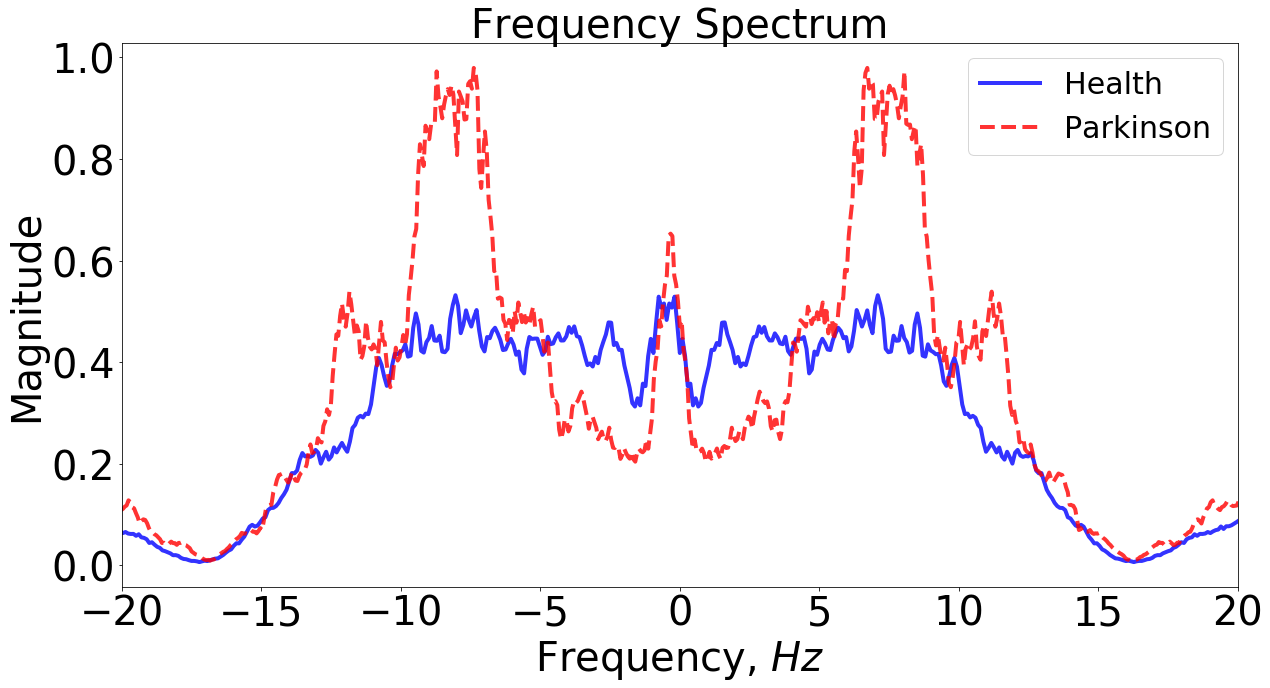

In [0]:
plt.figure(figsize= (20,10))
fft_noise_h = np.fft.fft(np.convolve(health['acc_y, mg'], np.array([1,-1,1,-1,1,-1])))
fft_noise_p = np.fft.fft(np.convolve(parkinson['acc_y, mg'], np.array([1,-1,1,-1,1,-1])))

# fft_noise_h = np.fft.fft(health['acc_y, mg'])
# fft_noise_p = np.fft.fft(parkinson['acc_y, mg'])

freq_noise_h = np.fft.fftfreq(len(fft_noise_h), 0.01)
freq_noise_p = np.fft.fftfreq(len(fft_noise_p), 0.01)
labels_noise_h = np.argsort(freq_noise_h)
labels_noise_p = np.argsort(freq_noise_p)
print(len(freq_noise_h), len(fft_noise_h))
conv = np.convolve(np.abs(fft_noise_h)[labels_noise_h], np.ones(11)/11)[10:]
# conv  = np.abs(fft_noise_h)[labels_noise_h]
print(len(conv), len(labels_noise_h))
a = conv.max()
# labels_plot = np.abs(freq_noise_h[labels_noise_h]) > 2
plt.plot(freq_noise_h[labels_noise_h], conv/7000, 'b', linewidth=4, alpha = 0.8, label = 'Health')
conv = np.convolve(np.abs(fft_noise_p)[labels_noise_p], np.ones(11)/11)[10:]
# conv  = np.abs(fft_noise_p)[labels_noise_p]
# labels_plot = np.abs(freq_noise_p[labels_noise_p]) > 2
plt.plot(freq_noise_p[labels_noise_p], conv/7000, '--r', linewidth=4, alpha = 0.8, label = 'Parkinson')
plt.title("Frequency Spectrum", fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.ylabel("Magnitude", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.legend(fontsize = 30)
plt.xlim(-20,20)
# plt.ylim(0, 1)
plt.savefig("C:/Users/1/Desktop/Spectrum_all_highpassfilter.jpg")
print(std_h.sum(), std_p.sum())

1057 1057


(-20, 20)

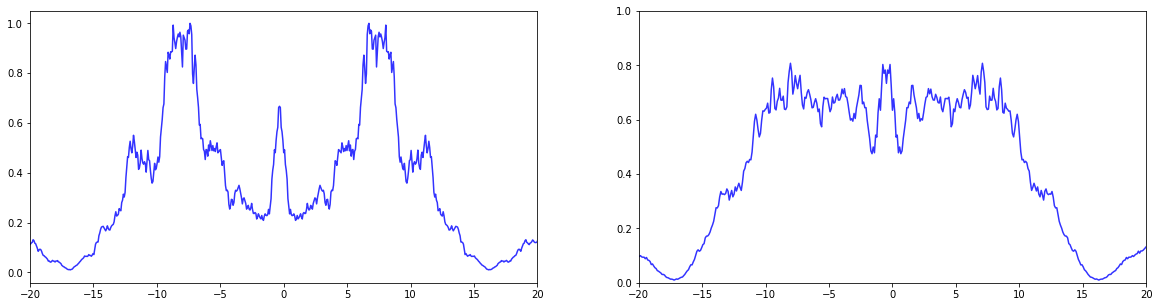

In [0]:
from scipy.optimize import curve_fit
conv = np.convolve(np.abs(fft_noise_p)[labels_noise_p], np.ones(11)/11)[10:]
f, (ax0, ax1) = plt.subplots(1, 2, figsize = (20,5))
ax0.plot(freq_noise_p[labels_noise_p], conv/conv.max(), c = 'b', alpha = 0.8)
ax0.set_xlim(-20, 20)
conv = np.convolve(np.abs(fft_noise_h)[labels_noise_h], np.ones(11)/11)[10:]
print(len(conv), len(labels_noise_h))
ax1.plot(freq_noise_h[labels_noise_h], conv/conv.max(), c = 'b', alpha = 0.8, label = 'Health')
ax1.set_ylim(0, 1)
ax1.set_xlim(-20, 20)